In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip3 install nlpaug
import tarfile

In [2]:
!curl --header "Host: www.cl.cam.ac.uk" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en;q=0.9" --header "Referer: https://www.cl.cam.ac.uk/research/nl/bea2019st/" "https://www.cl.cam.ac.uk/research/nl/bea2019st/data/fce_v2.1.bea19.tar.gz" -L -o "fce_v2.1.bea19.tar.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2709k  100 2709k    0     0  14.4M      0 --:--:-- --:--:-- --:--:-- 14.5M


In [3]:
import tarfile
fname='/content/fce_v2.1.bea19.tar.gz'
fname.endswith("tar.gz")
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()

In [4]:
!curl --header "Host: www.cl.cam.ac.uk" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en;q=0.9" --header "Referer: https://www.cl.cam.ac.uk/research/nl/bea2019st/" "https://www.cl.cam.ac.uk/research/nl/bea2019st/data/wi+locness_v2.1.bea19.tar.gz" -L -o "wi+locness_v2.1.bea19.tar.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5977k  100 5977k    0     0  27.2M      0 --:--:-- --:--:-- --:--:-- 27.1M


In [5]:
import tarfile
fname='/content/wi+locness_v2.1.bea19.tar.gz'
fname.endswith("tar.gz")
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()

In [6]:
def m2_to_txt(path):
  '''
  this function processes the .m2 format file 
  and converts the required sentence into txt format'''
  m2 = open(path).read().strip().split("\n\n")
  corrupted = open('corrupted.txt', "w")
  uncorrupted=open('uncorrupted.txt','w')
  skip = {"noop", "UNK", "Um"}
  for sent in m2:
    sent=sent.split('\n')
  
    incorr_sent=sent[0].split()[1:]
  
    corrupted.write(" ".join(incorr_sent)+"\n")
    edits = sent[1:]
  
    offset=0
  
    for edit in edits:
		    edit = edit.split("|||")
		    if edit[1] in skip: continue # Ignore certain edits
			
			
		    span = edit[0].split()[1:] # Ignore "A "
		    start = int(span[0])
		    end = int(span[1])
		    cor = edit[2].split()
		    incorr_sent[start+offset:end+offset] = cor
      
		    offset = offset-(end-start)+len(cor)
      
    uncorrupted.write(" ".join(incorr_sent)+"\n")


In [7]:
m2_to_txt('/content/fce/m2/fce.dev.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data1=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/fce/m2/fce.train.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data2=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/wi+locness/m2/N.dev.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data3=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/wi+locness/m2/C.dev.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data4=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/wi+locness/m2/B.dev.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data5=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/wi+locness/m2/ABCN.dev.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data6=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/wi+locness/m2/A.dev.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data7=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

m2_to_txt('/content/wi+locness/m2/A.train.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data8=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])


m2_to_txt('/content/wi+locness/m2/B.train.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data9=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])


m2_to_txt('/content/wi+locness/m2/ABC.train.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data10=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])


m2_to_txt('/content/wi+locness/m2/C.train.gold.bea19.m2')
with open('uncorrupted.txt','r') as file:
  uncorrupted=[]
  line=file.readlines()
  for lines in line:
    uncorrupted.append(" ".join(lines.split()[:len(lines)]))
with open('corrupted.txt','r') as file:
  corrupted=[]
  line=file.readlines()
  for lines in line:
    corrupted.append(" ".join(lines.split()[:len(lines)]))

data11=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])




##have to introduce some missing character fromwords..so that the model can also learn from this..

In [8]:
data=pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11],ignore_index=True)

In [9]:
data=data[data['corrupted']!=data['uncorrupted']]

In [10]:
data13=data.iloc[35000:]

In [11]:
data14=data.iloc[:35000]

In [12]:
#from nlpaug.augmenter.char.keyboard import KeyboardAug

In [13]:
#aug=KeyboardAug(name='Keyboard_Aug', aug_char_min=1, aug_char_max=4, aug_char_p=0.3, aug_word_p=0.2, aug_word_min=1, aug_word_max=5,
 #              stopwords=None, tokenizer=None, reverse_tokenizer=None, include_special_char=False, include_numeric=False, 
  #              include_upper_case=True, lang='en', verbose=0, stopwords_regex=None, model_path=None, min_char=4)

In [14]:
#data_aug=data.sample(30000)

In [15]:
#corrupt=aug.augment(data13['corrupted'].tolist())

In [16]:
#data13=pd.DataFrame(zip(corrupt,data13['uncorrupted'].tolist()),columns=['corrupted','uncorrupted'])

In [17]:
#data13

In [18]:
#https://stackoverflow.com/questions/30887979/i-want-to-create-a-script-for-unzip-tar-gz-file-via-python
import tarfile
fname='sm_norm_mt.tar.gz'
fname.endswith("tar.gz")
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()


In [19]:
#https://stackoverflow.com/questions/53987653/read-a-text-file-contents-from-second-line-in-python
with open('/content/release/en2cn-2k.en2nen2cn','r') as file:
  line=file.readlines()
corrupted=[]
uncorrupted=[]
for i,lines in enumerate(line):
  if i%3==0:
    corrupted.append(lines.strip())
  elif (i%3==1):
    uncorrupted.append(lines.strip())
  else:
    pass
  


In [20]:
data12=pd.DataFrame(zip(corrupted,uncorrupted),columns=['corrupted','uncorrupted'])

In [21]:
data12.head()

,corrupted,uncorrupted
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...


In [22]:
#data=pd.concat([data12,data13,data14],ignore_index=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70197 entries, 3 to 107922
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   corrupted    70197 non-null  object
 1   uncorrupted  70197 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [24]:
data= data.sample(frac=1).reset_index(drop=True)

##CONCLUSION--
    1.THERE ARE 2000 TEXT DATA,THE DATASET DOES NOT CONTAIN ANY NULL VALUES.
    2.THE SIZE OF DATASET IS TOO SMALL FOR DEEP LEARNING TASKS.



In [25]:
data=data.drop_duplicates()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44368 entries, 0 to 70194
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   corrupted    44368 non-null  object
 1   uncorrupted  44368 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


#CHECKING FOR WORD LENGTHS FOR BOTH COLUMN

In [ ]:
word_len_corrupt=data['corrupted'].str.split().str.len()


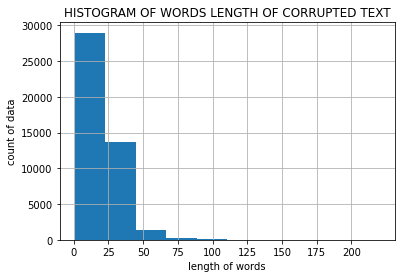

In [ ]:
plt.hist(word_len_corrupt)
plt.xticks(range(0,225,25))
plt.grid()
plt.xlabel("length of words")
plt.ylabel('count of data')
plt.title("HISTOGRAM OF WORDS LENGTH OF CORRUPTED TEXT")
plt.show()

#CONCLUSION--
    1.THERE ARE VERY MUCH LESS WORDS HAVING LENGTH GREATER THAN 75
    2.THERE ARE MORE THAN 40000 WORDS HAVING LENGTH BETWEEN 0 AND 23
    3.THE WORD LENGTH RESEMBLES A RIGHT SKEWED DISTRIBUTION
    4.MOST OF THE WORDS HAVE LENGTH BETWEEN 0 TP 48
    5.THE MORE THE WORDS IN A SENTENCE MORE TIME IT WILL TAKE TO RUN THE MODEL..SINCE IT WILL TAKE MORE TIME TO UNRAVEL IN LSTM'S.

In [ ]:
word_len_uncorrupt=data['uncorrupted'].str.split().str.len()

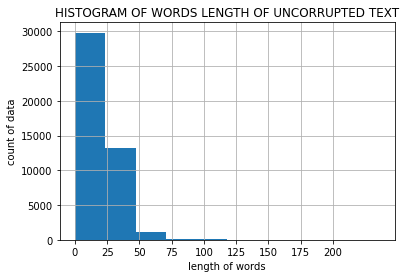

In [ ]:
plt.hist(word_len_uncorrupt)
plt.xticks(range(0,225,25))
plt.grid()
plt.xlabel("length of words")
plt.ylabel('count of data')
plt.title("HISTOGRAM OF WORDS LENGTH OF UNCORRUPTED TEXT")
plt.show()

#CONCLUSION--
    1.THERE ARE VERY MUCH LESS WORDS HAVING LENGTH GREATER THAN 75
    2.THERE ARE MORE THAN 40000 WORDS HAVING LENGTH BETWEEN 0 AND 50
    3.THE WORD LENGTH RESEMBLES A RIGHT SKEWED DISTRIBUTION
    4.MOST OF THE WORDS HAVE LENGTH BETWEEN 0 TO 48

#PERCENTILES OF WORD LENGTH

##FOR CORRUPTED DATA

In [ ]:
for i in range(0,101,10):
    print("{} percentile is: {}".format(i,np.percentile(word_len_corrupt, i)))

0 percentile is: 1.0
10 percentile is: 9.0
20 percentile is: 12.0
30 percentile is: 14.0
40 percentile is: 16.0
50 percentile is: 18.0
60 percentile is: 21.0
70 percentile is: 24.0
80 percentile is: 28.0
90 percentile is: 35.0
100 percentile is: 220.0


In [ ]:
for i in range(90,101):
    print("{} percentile is: {}".format(i,np.percentile(word_len_corrupt, i)))

90 percentile is: 35.0
91 percentile is: 36.0
92 percentile is: 37.0
93 percentile is: 38.0
94 percentile is: 40.0
95 percentile is: 42.0
96 percentile is: 44.0
97 percentile is: 47.0
98 percentile is: 52.0
99 percentile is: 60.0
100 percentile is: 220.0


In [ ]:
list=[99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for i in list:
    print("{} percentile is: {}".format(i,np.percentile(word_len_corrupt, i)))

99.1 percentile is: 61.697000000000116
99.2 percentile is: 63.0
99.3 percentile is: 66.0
99.4 percentile is: 68.0
99.5 percentile is: 71.0
99.6 percentile is: 75.0
99.7 percentile is: 79.0
99.8 percentile is: 89.0
99.9 percentile is: 107.63300000000163
100 percentile is: 220.0


##FOR UNCORRUPTED DATA

In [ ]:
for i in range(0,101,10):
    print("{} percentile is: {}".format(i,np.percentile(word_len_uncorrupt, i)))

0 percentile is: 0.0
10 percentile is: 9.0
20 percentile is: 12.0
30 percentile is: 14.0
40 percentile is: 16.0
50 percentile is: 19.0
60 percentile is: 21.0
70 percentile is: 24.0
80 percentile is: 29.0
90 percentile is: 35.0
100 percentile is: 236.0


In [ ]:
for i in range(90,101):
    print("{} percentile is: {}".format(i,np.percentile(word_len_uncorrupt, i)))

90 percentile is: 35.0
91 percentile is: 36.0
92 percentile is: 38.0
93 percentile is: 39.0
94 percentile is: 41.0
95 percentile is: 43.0
96 percentile is: 45.0
97 percentile is: 48.0
98 percentile is: 53.0
99 percentile is: 62.0
100 percentile is: 236.0


In [ ]:
for i in list:
    print("{} percentile is: {}".format(i,np.percentile(word_len_uncorrupt, i)))

99.1 percentile is: 63.0
99.2 percentile is: 65.0
99.3 percentile is: 67.0
99.4 percentile is: 69.7980000000025
99.5 percentile is: 72.16500000000087
99.6 percentile is: 77.0
99.7 percentile is: 82.0
99.8 percentile is: 93.26600000000326
99.9 percentile is: 111.0
100 percentile is: 236.0


#WORD CLOUD:

In [ ]:
def length(x):
  '''
  creating own function to calculate length of list
  '''
  count=0
  for i in x:
    count+=1
  return count

In [ ]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
def word_cloud(df,col):

    comment_words = '' 
    stopwords = set(STOPWORDS) 

# iterate through the csv file 
    for val in df[col]:
        val = str(val) 
    # split the value 
        tokens = val.split() 
        
    # Converts each token into lowercase 
        for i in range(len(tokens)): #used my own funtion for calcluating length of list...since the inbuilt len() was giving error!
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image
    plt.figure(figsize = (8,8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WORD CLOUD")
    plt.show()

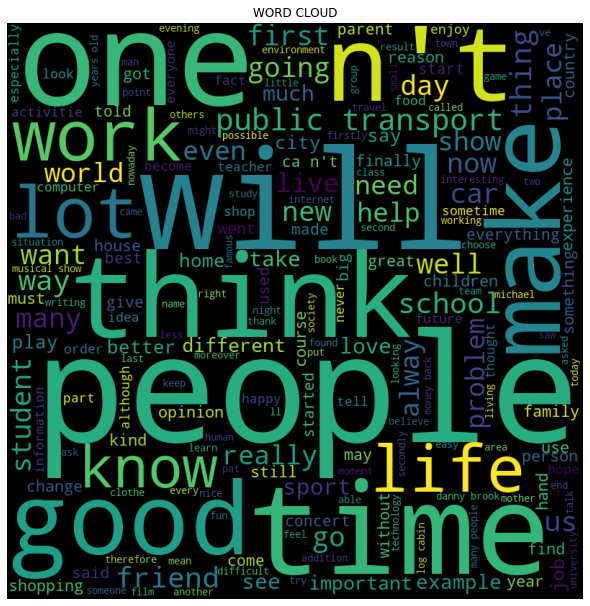

In [ ]:
word_cloud(data,'corrupted')

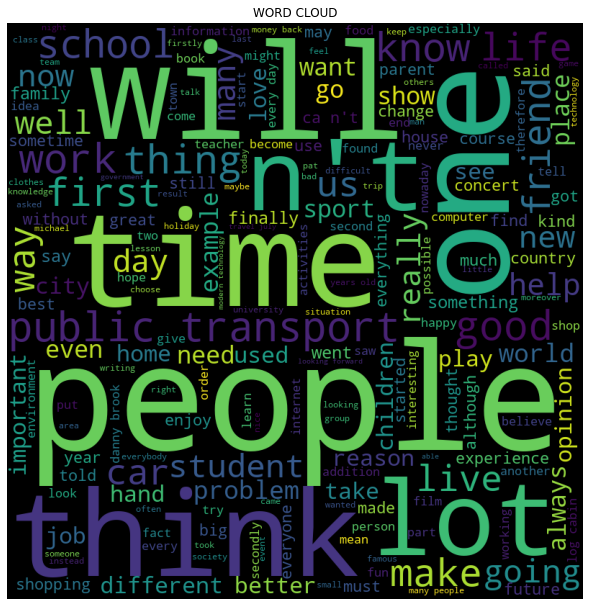

In [ ]:
word_cloud(data,'uncorrupted')

#CONCLUSION--
    1.WORDS LIKE 'PEOPLE','TRANSPORT','PUBLIC' OCCURES MOSR FREQUENTLY..IN BOTH COLUMNS OF DATA..AND THEY ARE CORRECTLY SPEELLED...SO MOST OF OUR DATA WOULD CONTAIN EITHER GRAMATICAL ERRORS OR SMALL TENSE AND SPELLING MISMATCH


#PREPROCESSING

##CLEANING THE DATASET

In [ ]:
'''import re
def data_cleaning(text):
    """
    takes string as input,we are only removing characters which are of no use for our task
    the function removes characters inside (),{},[] and <>
    and also characters like -+@#^/|*(){}$~`and all digits.
    we not not removing ,.!-:;"' as these characters are present in english language 
    """
    text = re.sub('<.*>', '', text)
    text = re.sub('\(.*\)', '', text)
    text = re.sub('\[.*\]', '', text)
    text = re.sub('{.*}', '', text)
    text = re.sub("[-+@#^/|*(){}$~`<>=_]","",text)
    text = text.replace("\\","")
    text = re.sub("\[","",text)
    text = re.sub("\]","",text)
    text = re.sub("[0-9]","",text)
    return text'''

'import re\ndef data_cleaning(text):\n    """\n    takes string as input,we are only removing characters which are of no use for our task\n    the function removes characters inside (),{},[] and <>\n    and also characters like -+@#^/|*(){}$~`and all digits.\n    we not not removing ,.!-:;"\' as these characters are present in english language \n    """\n    text = re.sub(\'<.*>\', \'\', text)\n    text = re.sub(\'\\(.*\\)\', \'\', text)\n    text = re.sub(\'\\[.*\\]\', \'\', text)\n    text = re.sub(\'{.*}\', \'\', text)\n    text = re.sub("[-+@#^/|*(){}$~`<>=_]","",text)\n    text = text.replace("\\","")\n    text = re.sub("\\[","",text)\n    text = re.sub("\\]","",text)\n    text = re.sub("[0-9]","",text)\n    return text'

In [27]:
import re
def decontractions(phrase):
  """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""

  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  phrase = re.sub(r"won\’t", "will not", phrase)
  phrase = re.sub(r"can\’t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)

  return phrase

In [28]:
data['corrupted']=data['corrupted'].apply(lambda x:decontractions(x))
data['uncorrupted']=data['uncorrupted'].apply(lambda x:decontractions(x))

data12['corrupted']=data12['corrupted'].apply(lambda x:decontractions(x))
data12['uncorrupted']=data12['uncorrupted'].apply(lambda x:decontractions(x))

##CONVERTING TO LOWER CASE

In [29]:
data['corrupted']=data['corrupted'].apply(lambda x:x.lower())
data['uncorrupted']=data['uncorrupted'].apply(lambda x:x.lower())

data12['corrupted']=data12['corrupted'].apply(lambda x:x.lower())
data12['uncorrupted']=data12['uncorrupted'].apply(lambda x:x.lower())

##CONSIDERING SENTENCES WITH WORD_LENGTH<100 AS PER PERCENTILES..

In [30]:
data['corrupted_len'] = data['corrupted'].str.split().apply(len)
data = data[data['corrupted_len'] < 25]

data['uncorrupted_len'] = data['uncorrupted'].str.split().apply(len)
data = data[data['uncorrupted_len'] < 25]

data12['corrupted_len'] = data12['corrupted'].str.split().apply(len)
data12 = data12[data12['corrupted_len'] < 25]

data12['uncorrupted_len'] = data12['uncorrupted'].str.split().apply(len)
data12 = data12[data12['uncorrupted_len'] < 25]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


##ADDING 'START' AND 'END' TOKEN.

In [31]:
data['uncorrupted_inp']=data['uncorrupted'].apply(lambda x:('<START>'+' '+x))
data['uncorrupted_op']=data['uncorrupted'].apply(lambda x:(x+' '+'<END>'))
data.drop(['uncorrupted'],axis=1,inplace=True)

data12['uncorrupted_inp']=data12['uncorrupted'].apply(lambda x:('<START>'+' '+x))
data12['uncorrupted_op']=data12['uncorrupted'].apply(lambda x:(x+' '+'<END>'))
data12.drop(['uncorrupted'],axis=1,inplace=True)

In [32]:
data.drop(['corrupted_len','uncorrupted_len'],axis=1,inplace=True)
data12.drop(['corrupted_len','uncorrupted_len'],axis=1,inplace=True)

##SPLITTING DATASET

In [33]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   corrupted        1675 non-null   object
 1   uncorrupted_inp  1675 non-null   object
 2   uncorrupted_op   1675 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [34]:
data=data.sample(5000)

In [35]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data, test_size=0.2)

In [36]:
train.shape

(4000, 3)

In [37]:
train=pd.concat([train,data12.iloc[0:1500]],ignore_index=True).astype(str)
validation=pd.concat([validation,data12.iloc[1500:1675]],ignore_index=True).astype(str)

In [38]:
train.head()

,corrupted,uncorrupted_inp,uncorrupted_op
0,the key point why expanded used clothes indust...,<START> the key reason why the used clothes in...,the key reason why the used clothes industry e...
1,playing football at a regular basis helps to m...,<START> playing football on a regular basis he...,playing football on a regular basis helps to m...
2,"i am not playing basketball well , but my fri...","<START> i do not play basketball well , but m...","i do not play basketball well , but my friend..."
3,ufo story started already in antiquity .,<START> stories about ufos started in antiquity .,stories about ufos started in antiquity . <END>
4,they have a very simple life and behavior when...,<START> they have a very simple life and behav...,they have a very simple life and behaviour whe...


In [39]:
print(train.shape, validation.shape)
# for one sentence we will be adding <end> token so that the tokanizer learns the word <end>
# with this we can use only one tokenizer for both encoder output and decoder output
train.iloc[0]['uncorrupted_inp']= str(train.iloc[0]['uncorrupted_inp'])+' <end>'
train.iloc[0]['uncorrupted_out']= str(train.iloc[0]['uncorrupted_op'])+' <end>'

(5500, 3) (1175, 3)


In [40]:
train.sample(frac=1)

,corrupted,uncorrupted_inp,uncorrupted_op
3896,there are also many kinds of take - away resta...,<START> there are also many kinds of take - aw...,there are also many kinds of take - away resta...
2215,"when i approached them , they said they ca no...","<START> when i approached them , they said the...","when i approached them , they said they could ..."
4746,yup can see millian! no need sq table lor. wha...,"<START> yup, can see millian! you do not need ...","yup, can see millian! you do not need square t..."
4554,helo k.reen n p.ple.hw r u?care 2 chat any1?,"<START> hello, k.reen and people. how are you?...","hello, k.reen and people. how are you? care to..."
4628,ya la... not v weird la... funky...,<START> yes. it is not very weird. funky.,yes. it is not very weird. funky. <END>
...,...,...,...
4087,stop liao.. e ikea ppl just came.,<START> stop already. the ikea people just came.,stop already. the ikea people just came. <END>
52,so i sitted in my chair and waited for 45 minu...,<START> so i sat in my chair and waited for 45...,so i sat in my chair and waited for 45 minutes...
1521,"to sum up , as thought the cars are too coveni...","<START> to sum up , as thought cars are too co...","to sum up , as thought cars are too convenient..."
5278,"yeah must sign up,im in lt25","<START> yeah must sign up, i am in lecture the...","yeah must sign up, i am in lecture theatre 25...."


##TOKENIZING THE DATA AND CALCULATING WORD EMBEDDINGS

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
tok_corrupted=Tokenizer(filters='#$%&()*+-/=@[\\]^_`{|}~\t\n')
tok_corrupted.fit_on_texts(train['corrupted'].values)

tok_uncorrupted=Tokenizer(filters='#$%&()*+-/=@[\\]^_`{|}~\t\n')
tok_uncorrupted.fit_on_texts(train['uncorrupted_inp'].values)

In [42]:
vocab_corrupt=len(tok_corrupted.word_index.keys())
print(vocab_corrupt)

vocab_uncorrupt=len(tok_uncorrupted.word_index.keys())
print(vocab_uncorrupt)

8828
7430


In [43]:
!wget https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt

--2021-11-02 10:03:55--  https://www.dropbox.com/s/ddkmtqz01jc024u/glove.6B.100d.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ddkmtqz01jc024u/glove.6B.100d.txt [following]
--2021-11-02 10:03:56--  https://www.dropbox.com/s/raw/ddkmtqz01jc024u/glove.6B.100d.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd27a1883f85408a3ab4687d9e.dl.dropboxusercontent.com/cd/0/inline/BZPMLKTehdt95iPI0rgT7p4_VDcMd3h8r0wA9K7IzTvV94ETsjIugLzQ3G4SqxCEuFEDriS0DeBDXwlfkOqQ745JIqOdz0PcEk4ZeR6QXfwDOvarqhdCN4Aj2_BAvyD9cHWV3d5PZ9swJGa1qDpWdVU6/file# [following]
--2021-11-02 10:03:56--  https://uccd27a1883f85408a3ab4687d9e.dl.dropboxusercontent.com/cd/0/inline/BZPMLKTehdt95iPI0rgT7p4_VDcMd3h8r0wA9K7IzTvV94ETsjIugLzQ3G4SqxCEuFEDriS0

In [44]:
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((vocab_corrupt+1, 100))
for word, i in tok_corrupted.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [45]:
embedding_matrix.shape

(8829, 100)

##USING FASTTEXT FOR GETTING WORD EMBEDDINGS

In [46]:
#!curl --header "Host: dl.fbaipublicfiles.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en;q=0.9" --header "Referer: https://fasttext.cc/" "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip" -L -o "wiki-news-300d-1M.vec.zip"

In [47]:
#!unzip /content/wiki-news-300d-1M.vec.zip

In [48]:
#!pip3 install fasttext

In [49]:
'''#https://fasttext.cc/docs/en/crawl-vectors.html
#reducing dimension 
import fasttext
import fasttext.util
ft = fasttext.load_model('cc.en.300.bin')
ft.get_dimension()

fasttext.util.reduce_model(ft, 100)
ft.get_dimension()

ft.save_model('cc.en.100.bin')'''

"#https://fasttext.cc/docs/en/crawl-vectors.html\n#reducing dimension \nimport fasttext\nimport fasttext.util\nft = fasttext.load_model('cc.en.300.bin')\nft.get_dimension()\n\nfasttext.util.reduce_model(ft, 100)\nft.get_dimension()\n\nft.save_model('cc.en.100.bin')"

In [50]:
#https://fasttext.cc/docs/en/english-vectors.html

## using fasttext embedding

'''import io
from tqdm import tqdm

def load_vectors(fname):
    
    """
    this function takes name of file as input and returns a dictionary
    which contins word embedding of 300 dimension for each word
    """
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in tqdm(fin):
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

dic=load_vectors('cc.en.100.bin')'''

'import io\nfrom tqdm import tqdm\n\ndef load_vectors(fname):\n    \n    """\n    this function takes name of file as input and returns a dictionary\n    which contins word embedding of 300 dimension for each word\n    """\n    fin = io.open(fname, \'r\', encoding=\'utf-8\', newline=\'\n\', errors=\'ignore\')\n    n, d = map(int, fin.readline().split())\n    data = {}\n    for line in tqdm(fin):\n        tokens = line.rstrip().split(\' \')\n        data[tokens[0]] = map(float, tokens[1:])\n    return data\n\ndic=load_vectors(\'cc.en.100.bin\')'

In [51]:
'''embedding_matrix1 = np.zeros((vocab_corrupt+1, 300))
for word, i in tok_corrupted.word_index.items():
  embedding_vector = dic.get(word)
  if embedding_vector is not None:
    embedding_matrix1[i] = list(embedding_vector)'''

'embedding_matrix1 = np.zeros((vocab_corrupt+1, 300))\nfor word, i in tok_corrupted.word_index.items():\n  embedding_vector = dic.get(word)\n  if embedding_vector is not None:\n    embedding_matrix1[i] = list(embedding_vector)'

#MODELLING

##ENCODER DECODER MODEL

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint 
import numpy as np
import datetime

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        self.embedding = Embedding(input_dim=inp_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm = LSTM(lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")


    def call(self,input_sequence,training=True):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd                           = self.embedding(input_sequence)
        self.lstm_output, self.state_h,self.state_c = self.lstm(input_embedd)
        return self.lstm_output, self.state_h,self.state_c
      

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.state_h=tf.zeros([batch_size])
      self.state_c=tf.zeros([batch_size])
      return self.state_h,self.state_c

In [ ]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        self.embedding = Embedding(input_dim=out_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_decoder")
        self.lstm = LSTM(lstm_size, return_sequences=True, return_state=True, name="Decoder_LSTM")
        


    def call(self,input_sequence,initial_state):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        target_embedd           = self.embedding(input_sequence)
        lstm_output,state_h,state_c       = self.lstm(target_embedd, initial_state)
        return lstm_output,state_h,state_c 

In [ ]:
class Dataset:
    def __init__(self, data, tok_corrupt, tok_uncorrupt, max_len):
        self.encoder_inps = data['corrupted'].values
        self.decoder_inps = data['uncorrupted_inp'].values
        self.decoder_outs = data['uncorrupted_op'].values
        self.tok_corrupt = tok_corrupt
        self.tok_uncorrupt = tok_uncorrupt
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tok_corrupt.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))

    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [ ]:
train_dataset = Dataset(train, tok_corrupted, tok_uncorrupted,25 )
test_dataset  = Dataset(validation,tok_corrupted, tok_uncorrupted,25)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size=64)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 25) (64, 25) (64, 25)


In [ ]:
class Encoder_decoder(tf.keras.Model):
    
    def __init__(self,encoder_inputs_length,decoder_inputs_length, output_vocab_size):
        
        #Create encoder object
        #Create decoder object
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder( inp_vocab_size=vocab_corrupt+1, embedding_size=100, input_length=encoder_inputs_length, lstm_size=512)
        self.decoder = Decoder( out_vocab_size=vocab_uncorrupt+1, embedding_size=100, input_length=decoder_inputs_length, lstm_size=512)
        self.dense   = Dense(output_vocab_size, activation='Softmax')
    
    
    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs

        '''
        input,output = data[0], data[1]
        print(input.shape,output.shape)
        encoder_output, encoder_h, encoder_c = self.encoder(input)
        decoder_output,_,_                     = self.decoder(output, initial_state=[encoder_h, encoder_c])
        output                               = self.dense(decoder_output)
        return output
        
        

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.9, monitor='loss', patience=3, verbose=1, mode='max') 

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def changeLearningRate(epoch, lr):
    if ((epoch+1) % 5)==0:
        changed_lr = (lr - (lr*0.05))
        return changed_lr
    else:
        return lr

lr_schedule = LearningRateScheduler(changeLearningRate, verbose=1)

In [ ]:
!pip3 install keras-adaptive-softmax

  Created wheel for keras-adaptive-softmax: filename=keras_adaptive_softmax-0.8.0-py3-none-any.whl size=20097 sha256=33136c63d945c02b00c34197e383172d0a42fe13976f5690a944b9b03d0b5fa8
  Stored in directory: /root/.cache/pip/wheels/a6/ed/8d/e60571bd3fe464d8b32a9e7ddbb4f2d2f91cda97b70fbf71e5
Successfully built keras-adaptive-softmax


In [ ]:
from keras_adaptive_softmax import AdaptiveEmbedding, AdaptiveSoftmax
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

ModuleNotFoundError: ignored

In [ ]:
get_custom_objects().update({'AdaptiveSoftmax': Activation(AdaptiveSoftmax)})

In [ ]:
#Create an object of encoder_decoder Model class, 
# Compile the model and fit the model
model1  = Encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,output_vocab_size=vocab_uncorrupt)
optimizer = tf.keras.optimizers.Adam()
filepath="model_save/weights-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',  verbose=1, save_best_only=True, mode='auto')

log_dir="log/fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

callback_list = [tensorboard_callback]
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')


In [ ]:
batch_size=64
train_steps=train.shape[0]//batch_size
valid_steps=validation.shape[0]//batch_size
model1.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=1,validation_data=train_dataloader, validation_steps=valid_steps,callbacks=callback_list)
model1.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


(64, 25) (64, 25)
(None, None) (None, None)
(None, None) (None, None)
85/85 [==============================] - 20s 131ms/step - loss: 3.9586 - val_loss: 3.6783
Model: "encoder_decoder_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_3 (Encoder)          multiple                  2139124   
_________________________________________________________________
decoder_2 (Decoder)          multiple                  1993524   
_________________________________________________________________
dense_2 (Dense)              multiple                  3785940   
Total params: 7,918,588
Trainable params: 7,918,588
Non-trainable params: 0
_________________________________________________________________


##PREDICTION USING GREEDY SEARCH

In [ ]:
def predict(input_sentence):

  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
  F. Return the predicted sentence
  '''
  inp_seq = tok_corrupted.texts_to_sequences([input_sentence])
  inp_seq = pad_sequences(inp_seq,padding='post',maxlen=25)

  en_outputs,state_h , state_c = model.layers[0](tf.constant(inp_seq))
  cur_vec = tf.constant([[tok_uncorrupted.word_index['<start>']]])
  pred = []
 #Here 25 is the max_length of the sequence
  for i in range(25):
    infe_output, state_h, state_c = model.layers[1](cur_vec,initial_state=[state_h,state_c])
    infe_output = model.layers[2](infe_output)
    cur_vec = np.reshape(np.argmax(infe_output), (1, 1))
    pred.append(tok_uncorrupted.index_word[cur_vec[0][0]])
    
    if(pred[-1]=='<end>'):
      break
    translated_sentence = ' '.join(pred)

  return translated_sentence

In [ ]:
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred=predict(i)
  
  predicted.append(' '.join(pred))

100%|██████████| 1175/1175 [02:37<00:00,  7.44it/s]


In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
#smoothie = SmoothingFunction().method7
for i in (zip(test['uncorrupted_op'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[0:-1]],i[1].split(' ')))
  #print(i[0].split())
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


average bleu score: 0.3538591831738474


In [ ]:
test.iloc[41]['corrupted']

'nowhere expresses moscow , russia  is vast and ancient capital like red square .'

In [ ]:
test.iloc[41]['uncorrupted_inp']

'<START> nowhere expresses moscow , russia  is vast and ancient capital , like red square .'

In [ ]:
predict(test.iloc[41]['corrupted'])

'nowadays , people people have time and these problems and employees .'

In [ ]:
predict('are u going?')

'are are you male?'

In [ ]:
predict('i has an apple.')

'i reached skat .'

##PREDICTION USING BEAM SEARCH

In [ ]:
#https://towardsdatascience.com/boosting-your-sequence-generation-performance-with-beam-search-language-model-decoding-74ee64de435a
import numpy as np
import math

def beam_search_decoder(predictions, k):
    #start with an empty sequence with zero score
    output_sequences = [([], 0)]
    
    #looping through all the predictions
    for token_probs in predictions:
        new_sequences = []
        
        #append new tokens to old sequences and re-score
        for old_seq, old_score in output_sequences:
            for char_index in range(len(token_probs)):
                new_seq = old_seq + [char_index]
                #considering log-likelihood for scoring
                new_score = old_score + math.log(token_probs[char_index])
                new_sequences.append((new_seq, new_score))
                
        #sort all new sequences in the de-creasing order of their score
        output_sequences = sorted(new_sequences, key = lambda val: val[1], reverse = True)
        
        #select top-k based on score 
        # *Note- best sequence is with the highest score
        output_sequences = output_sequences[:k]
        
    return output_sequences


In [ ]:
def predict(input_sentence):
    inp_seq = tok_corrupted.texts_to_sequences([input_sentence])
    inp_seq = pad_sequences(inp_seq,padding='post',maxlen=25)

    en_outputs,state_h , state_c = model.layers[0](tf.constant(inp_seq))
    cur_vec = tf.constant([[tok_uncorrupted.word_index['<start>']]])
    result=''
    for t in range(25):
        infe_output, state_h, state_c = model.layers[1](cur_vec,initial_state=[state_h,state_c])
        print(infe_output)
        [infe_output] = model.layers[2](infe_output)
        print(infe_output)
        
        #Beam Search Decoder
        Result_beam_list=beam_search_decoder(infe_output,k=1)
        Result_beam=Result_beam_list[0][0]
        break
        predicted_id = tf.argmax(infe_output[0]).numpy()
        #Predicted ID using beam search decoder
        if tok_uncorrupted.index_word[predicted_id] == '<end>':
          break
        result += tok_uncorrupted.index_word[Result_beam[0]] + ' '
          
        
            
        # the predicted ID is fed back into the model
        cur_vec = tf.expand_dims([predicted_id], 0)
    return result

In [ ]:
test.iloc[52]['corrupted']

'i ignored her i could  not do anything now .'

In [ ]:
test.iloc[52]['uncorrupted_inp']

'<START> i ignored her , i could  not do anything now .'

In [ ]:
predict(validation.iloc[52]['corrupted'])


TypeError: ignored

In [ ]:
test.iloc[120]['corrupted']

'the whole town is gorgeous and you seem to be in another age of history .'

In [ ]:
test.iloc[120]['uncorrupted_inp']

'<START> the whole town is gorgeous and you seem to be in another era .'

In [ ]:
predict(test.iloc[120]['corrupted'])

'the other benefit relates to have a car is more and more as a museum . '

In [ ]:
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation.sample(50)
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred=predict(i)
  
  predicted.append(' '.join(pred))

100%|██████████| 50/50 [40:58<00:00, 49.16s/it]


In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
#smoothie = SmoothingFunction().method7
for i in (zip(test['uncorrupted_op'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[0:-1]],i[1].split(' ')))
  #print(i[0].split())
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

average bleu score: 0.3691227393850964


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
predict('i will meet u b4 lec then...')

'i will meet you before the lecture then. '

In [ ]:
predict('u are going')

'you are you? '

In [ ]:
predict('i has an apple.')

#2 LSTM layers

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        self.embedding = Embedding(input_dim=inp_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm1 = LSTM(lstm_size, return_sequences=True, name="Encoder_LSTM1")
        self.lstm2 = LSTM(lstm_size,return_sequences=True,return_state=True,name='Encoder_LSTM2')


    def call(self,input_sequence,training=True):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd                           = self.embedding(input_sequence)
        self.lstm_output= self.lstm1(input_embedd)
        self.lstm_output1,self.state_h,self.state_c =self.lstm2(self.lstm_output)
        return self.lstm_output1, self.state_h,self.state_c
      

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.state_h=tf.zeros([batch_size])
      self.state_c=tf.zeros([batch_size])
      return self.state_h,self.state_c

In [ ]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        self.embedding = Embedding(input_dim=out_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_decoder")
        self.lstm = LSTM(lstm_size, return_sequences=True, return_state=True, name="Decoder_LSTM")
        


    def call(self,input_sequence,initial_state):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        target_embedd           = self.embedding(input_sequence)
        lstm_output,state_h,state_c       = self.lstm(target_embedd, initial_state)
        return lstm_output,state_h,state_c 

In [ ]:
class Dataset:
    def __init__(self, data, tok_corrupt, tok_uncorrupt, max_len):
        self.encoder_inps = data['corrupted'].values
        self.decoder_inps = data['uncorrupted_inp'].values
        self.decoder_outs = data['uncorrupted_op'].values
        self.tok_corrupt = tok_corrupt
        self.tok_uncorrupt = tok_uncorrupt
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tok_corrupt.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))

    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [ ]:
train_dataset = Dataset(train, tok_corrupted, tok_uncorrupted,25 )
test_dataset  = Dataset(validation,tok_corrupted, tok_uncorrupted,25)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size=64)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 25) (64, 25) (64, 25)


In [ ]:
class Encoder_decoder(tf.keras.Model):
    
    def __init__(self,encoder_inputs_length,decoder_inputs_length, output_vocab_size):
        
        #Create encoder object
        #Create decoder object
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder( inp_vocab_size=vocab_corrupt+1, embedding_size=100, input_length=encoder_inputs_length, lstm_size=512)
        self.decoder = Decoder( out_vocab_size=vocab_uncorrupt+1, embedding_size=100, input_length=decoder_inputs_length, lstm_size=512)
        self.dense   = Dense(output_vocab_size, activation='Softmax')
    
    
    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs

        '''
        input,output = data[0], data[1]
        print(input.shape,output.shape)
        encoder_output, encoder_h, encoder_c = self.encoder(input)
        decoder_output,_,_                     = self.decoder(output, initial_state=[encoder_h, encoder_c])
        output                               = self.dense(decoder_output)
        return output
        
        

In [ ]:
model1  = Encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,output_vocab_size=vocab_uncorrupt)
optimizer = tf.keras.optimizers.Adam()
filepath="model_save/weights-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',  verbose=1, save_best_only=True, mode='auto')

log_dir="log/fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

callback_list = [tensorboard_callback]
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
batch_size=64
train_steps=train.shape[0]//batch_size
valid_steps=validation.shape[0]//batch_size
model1.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=1,validation_data=train_dataloader, validation_steps=valid_steps,callbacks=callback_list)
model1.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


(64, 25) (64, 25)
(None, None) (None, None)
(None, None) (None, None)
85/85 [==============================] - 27s 168ms/step - loss: 3.9890 - val_loss: 3.6941
Model: "encoder_decoder_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_5 (Encoder)          multiple                  4239424   
_________________________________________________________________
decoder_5 (Decoder)          multiple                  2000524   
_________________________________________________________________
dense_5 (Dense)              multiple                  3821850   
Total params: 10,061,798
Trainable params: 10,061,798
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=50,validation_data=train_dataloader, validation_steps=valid_steps,callbacks=callback_list)

Epoch 1/50
 1/85 [..............................] - ETA: 8s - loss: 0.5971

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


85/85 [==============================] - 10s 113ms/step - loss: 0.5745 - val_loss: 0.5915
Epoch 2/50
85/85 [==============================] - 9s 101ms/step - loss: 0.5455 - val_loss: 0.5649
Epoch 3/50
85/85 [==============================] - 9s 101ms/step - loss: 0.5178 - val_loss: 0.5325
Epoch 4/50
85/85 [==============================] - 9s 101ms/step - loss: 0.4899 - val_loss: 0.5047
Epoch 5/50
85/85 [==============================] - 9s 100ms/step - loss: 0.4658 - val_loss: 0.4843
Epoch 6/50
85/85 [==============================] - 9s 100ms/step - loss: 0.4436 - val_loss: 0.4639
Epoch 7/50
85/85 [==============================] - 9s 100ms/step - loss: 0.4207 - val_loss: 0.4377
Epoch 8/50
85/85 [==============================] - 9s 102ms/step - loss: 0.3924 - val_loss: 0.4047
Epoch 9/50
85/85 [==============================] - 9s 102ms/step - loss: 0.3697 - val_loss: 0.3828
Epoch 10/50
85/85 [==============================] - 9s 101ms/step - loss: 0.3486 - val_loss: 0.3570
Epoch 11/

##PREDICTION USING GREEDY SEARCH

In [ ]:
def predict(input_sentence):

  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
  F. Return the predicted sentence
  '''
  inp_seq = tok_corrupted.texts_to_sequences([input_sentence])
  inp_seq = pad_sequences(inp_seq,padding='post',maxlen=25)

  en_outputs,state_h , state_c = model.layers[0](tf.constant(inp_seq))
  cur_vec = tf.constant([[tok_uncorrupted.word_index['<start>']]])
  pred = []
 #Here 25 is the max_length of the sequence
  for i in range(25):
    infe_output, state_h, state_c = model.layers[1](cur_vec,initial_state=[state_h,state_c])
    infe_output = model.layers[2](infe_output)
    cur_vec = np.reshape(np.argmax(infe_output), (1, 1))
    pred.append(tok_uncorrupted.index_word[cur_vec[0][0]])
    
    if(pred[-1]=='<end>'):
      break
    translated_sentence = ' '.join(pred)

  return translated_sentence

In [ ]:
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred=predict(i)
  #predicted.append(tknizer_eng.sequences_to_texts([pred]))
  predicted.append(pred)


100%|██████████| 1175/1175 [02:47<00:00,  7.00it/s]


In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
#smoothie = SmoothingFunction().method7
for i in (zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


average bleu score: 0.435991599324281


In [ ]:
predict("are u going there")

'are you free now?'

In [ ]:
predict('i will meet u b4 lec then...')

'i will meet you before the lecture then.'

In [ ]:
train.iloc[12]['corrupted']

'i can buy , today , a book being comfortable at home , can communicate with other friends faster than before .'

In [ ]:
predict('the first problem is that we do  not have enough aparatous for all of the students')

'the first thing is that it will help with some information about it .'

In [ ]:
predict('first i did  not accept but finally she conviced me .')

'first , i like comedies and i feel used .'

In [ ]:
validation.iloc[55]['corrupted']

'she did  not tell me yet but when i came in class everybody was looking at me and this boy as well .'

In [ ]:
validation.iloc[55]['uncorrupted_inp']

'<START> she did  not tell me but when i came to the class everybody was looking at me and this boy as well .'

In [ ]:
predict('we need some special sport clothes for this two activities ? and is it also allowed to bring my dog with ?')

'we are so many reasons to explain to know to you about an enjure , i hope to hear from you .'

##PREDICTION USING BEAM SEARCH

In [ ]:
def predict(input_sentence):
    inp_seq = tok_corrupted.texts_to_sequences([input_sentence])
    inp_seq = pad_sequences(inp_seq,padding='post',maxlen=25)

    en_outputs,state_h , state_c = model.layers[0](tf.constant(inp_seq))
    cur_vec = tf.constant([[tok_uncorrupted.word_index['<start>']]])
    result=''
    for t in range(25):
        infe_output, state_h, state_c = model.layers[1](cur_vec,initial_state=[state_h,state_c])
        [infe_output] = model.layers[2](infe_output)
        
        #Beam Search Decoder
        Result_beam_list=beam_search_decoder(infe_output,k=1)
        Result_beam=Result_beam_list[0][0]
        
        predicted_id = tf.argmax(infe_output[0]).numpy()
        #Predicted ID using beam search decoder
        if tok_uncorrupted.index_word[predicted_id] == '<end>':
          break
        result += tok_uncorrupted.index_word[Result_beam[0]] + ' '
          
        
            
        # the predicted ID is fed back into the model
        cur_vec = tf.expand_dims([predicted_id], 0)
    return result

In [ ]:
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation.sample(50)
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred=predict(i)
  #predicted.append(tknizer_eng.sequences_to_texts([pred]))
  predicted.append(pred)


100%|██████████| 50/50 [46:05<00:00, 55.32s/it]


In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
#smoothie = SmoothingFunction().method7
for i in (zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

average bleu score: 0.463823766440637


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
predict("are u going there")

TypeError: ignored

In [ ]:
predict('i will meet u b4 lec then...')

'i will meet you before the lecture then. '

In [ ]:
train.iloc[12]['corrupted']

'i can buy , today , a book being comfortable at home , can communicate with other friends faster than before .'

In [ ]:
predict('the first problem is that we do  not have enough aparatous for all of the students')

'the first thing is that it will help with some information about it . '

In [ ]:
predict('first i did  not accept but finally she conviced me .')

'first , i like comedies and i feel used . '

In [ ]:
validation.iloc[55]['corrupted']

'she did  not tell me yet but when i came in class everybody was looking at me and this boy as well .'

In [ ]:
validation.iloc[55]['uncorrupted_inp']

'<START> she did  not tell me but when i came to the class everybody was looking at me and this boy as well .'

In [ ]:
predict(validation.iloc[55]['corrupted'])

'she did not feel bad about what kind of clothes and shoes will be put in a queue outside with me . '

#BIDIRECTION LSTM AS 1ST LAYER

In [ ]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns encoder-outputs,encoder_final_state_h,encoder_final_state_c
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        self.embedding = Embedding(input_dim=inp_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm1 = Bidirectional(LSTM(lstm_size, return_sequences=True, name="Encoder_BIDIRECTIONAL_LSTM"))
        self.lstm2 = LSTM(lstm_size,return_sequences=True,return_state=True,name='Encoder_LSTM2')


    def call(self,input_sequence,training=True):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- encoder_output, last time step's hidden and cell state
        '''
        input_embedd                           = self.embedding(input_sequence)
        self.lstm_output= self.lstm1(input_embedd)
        self.lstm_output1,self.state_h,self.state_c =self.lstm2(self.lstm_output)
        return self.lstm_output1, self.state_h,self.state_c
      

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.state_h=tf.zeros([batch_size])
      self.state_c=tf.zeros([batch_size])
      return self.state_h,self.state_c

In [ ]:
class Decoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Decoder LSTM layer
        self.embedding = Embedding(input_dim=out_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_decoder")
        self.lstm = LSTM(lstm_size, return_sequences=True, return_state=True, name="Decoder_LSTM")
        


    def call(self,input_sequence,initial_state):
        '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to decoder_lstm
        
          returns -- decoder_output,decoder_final_state_h,decoder_final_state_c
        '''
        target_embedd           = self.embedding(input_sequence)
        lstm_output,state_h,state_c       = self.lstm(target_embedd, initial_state)
        return lstm_output,state_h,state_c 

In [ ]:
class Dataset:
    def __init__(self, data, tok_corrupt, tok_uncorrupt, max_len):
        self.encoder_inps = data['corrupted'].values
        self.decoder_inps = data['uncorrupted_inp'].values
        self.decoder_outs = data['uncorrupted_op'].values
        self.tok_corrupt = tok_corrupt
        self.tok_uncorrupt = tok_uncorrupt
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tok_corrupt.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))

    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [ ]:
train_dataset = Dataset(train, tok_corrupted, tok_uncorrupted,25 )
test_dataset  = Dataset(validation,tok_corrupted, tok_uncorrupted,25)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size=64)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 25) (64, 25) (64, 25)


In [ ]:
class Encoder_decoder(tf.keras.Model):
    
    def __init__(self,encoder_inputs_length,decoder_inputs_length, output_vocab_size):
        
        #Create encoder object
        #Create decoder object
        #Intialize Dense layer(out_vocab_size) with activation='softmax'
        super().__init__() # https://stackoverflow.com/a/27134600/4084039
        self.encoder = Encoder( inp_vocab_size=vocab_corrupt+1, embedding_size=100, input_length=encoder_inputs_length, lstm_size=512)
        self.decoder = Decoder( out_vocab_size=vocab_uncorrupt+1, embedding_size=100, input_length=decoder_inputs_length, lstm_size=512)
        self.dense   = Dense(output_vocab_size, activation='Softmax')
    
    
    def call(self,data):
        '''
        A. Pass the input sequence to Encoder layer -- Return encoder_output,encoder_final_state_h,encoder_final_state_c
        B. Pass the target sequence to Decoder layer with intial states as encoder_final_state_h,encoder_final_state_C
        C. Pass the decoder_outputs into Dense layer 
        
        Return decoder_outputs

        '''
        input,output = data[0], data[1]
        print(input.shape,output.shape)
        encoder_output, encoder_h, encoder_c = self.encoder(input)
        decoder_output,_,_                     = self.decoder(output, initial_state=[encoder_h, encoder_c])
        output                               = self.dense(decoder_output)
        return output
        
        

In [ ]:
model1  = Encoder_decoder(encoder_inputs_length=25,decoder_inputs_length=25,output_vocab_size=vocab_uncorrupt)
optimizer = tf.keras.optimizers.Adam()
filepath="model_save/weights-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',  verbose=1, save_best_only=True, mode='auto')

log_dir="log/fit1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

callback_list = [tensorboard_callback]
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')
batch_size=64
train_steps=train.shape[0]//batch_size
valid_steps=validation.shape[0]//batch_size
model1.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=1,validation_data=train_dataloader, validation_steps=valid_steps,callbacks=callback_list)
model1.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


(64, 25) (64, 25)
(None, None) (None, None)
(None, None) (None, None)
85/85 [==============================] - 35s 212ms/step - loss: 3.9581 - val_loss: 3.6241
Model: "encoder_decoder_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_3 (Encoder)          multiple                  6543424   
_________________________________________________________________
decoder_3 (Decoder)          multiple                  2000524   
_________________________________________________________________
dense_3 (Dense)              multiple                  3821850   
Total params: 12,365,798
Trainable params: 12,365,798
Non-trainable params: 0
_________________________________________________________________


##PREDICTION USING GREEDY SEARCH

In [ ]:
def predict(input_sentence):

  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to decoder
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predicted_out,state_h,state_c=model.layers[1](dec_input,states)
         pass the predicted_out to the dense layer
         update the states=[state_h,state_c]
         And get the index of the word with maximum probability of the dense layer output, using the tokenizer(word index) get the word and then store it in a string.
         Update the input_to_decoder with current predictions
  F. Return the predicted sentence
  '''
  inp_seq = tok_corrupted.texts_to_sequences([input_sentence])
  inp_seq = pad_sequences(inp_seq,padding='post',maxlen=25)

  en_outputs,state_h , state_c = model.layers[0](tf.constant(inp_seq))
  cur_vec = tf.constant([[tok_uncorrupted.word_index['<start>']]])
  pred = []
 #Here 25 is the max_length of the sequence
  for i in range(25):
    infe_output, state_h, state_c = model.layers[1](cur_vec,initial_state=[state_h,state_c])
    infe_output = model.layers[2](infe_output)
    cur_vec = np.reshape(np.argmax(infe_output), (1, 1))
    pred.append(tok_uncorrupted.index_word[cur_vec[0][0]])
    
    if(pred[-1]=='<end>'):
      break
    translated_sentence = ' '.join(pred)

  return translated_sentence

In [ ]:
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred=predict(i)
  #predicted.append(tknizer_eng.sequences_to_texts([pred]))
  predicted.append(pred)


100%|██████████| 1175/1175 [03:14<00:00,  6.05it/s]


In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
#smoothie = SmoothingFunction().method7
for i in (zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


average bleu score: 0.45221547675461615


In [ ]:
predict('are u going there?')

TypeError: ignored

In [ ]:
validation.iloc[1000]['corrupted']

'rollin can chat wif u anot?'

In [ ]:
predict(validation.iloc[1000]['corrupted'])

'am study for me? i am better.'

##PREDICTION USING BEAM SEARCH

In [ ]:
def predict(input_sentence):
    inp_seq = tok_corrupted.texts_to_sequences([input_sentence])
    inp_seq = pad_sequences(inp_seq,padding='post',maxlen=25)
    
    en_outputs,state_h , state_c = model.layers[0](tf.constant(inp_seq))
    cur_vec = tf.constant([[tok_uncorrupted.word_index['<start>']]])
    result=''
    for t in range(25):
        infe_output, state_h, state_c = model.layers[1](cur_vec,initial_state=[state_h,state_c])
        [infe_output] = model.layers[2](infe_output)
        print(infe_output)
        
        #Beam Search Decoder
        Result_beam_list=beam_search_decoder(infe_output,k=1)
        Result_beam=Result_beam_list[0][0]
        
        predicted_id = tf.argmax(infe_output[0]).numpy()
        #Predicted ID using beam search decoder
        if tok_uncorrupted.index_word[predicted_id] == '<end>':
          break
        result += tok_uncorrupted.index_word[Result_beam[0]] + ' '
          
        
            
        # the predicted ID is fed back into the model
        cur_vec = tf.expand_dims([predicted_id], 0)
    return result

In [ ]:
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation.sample(50)
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred=predict(i)
  #predicted.append(tknizer_eng.sequences_to_texts([pred]))
  predicted.append(pred)


 62%|██████▏   | 31/50 [26:52<17:56, 56.65s/it]

In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
#smoothie = SmoothingFunction().method7
for i in (zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

In [ ]:
predict("are u going there")

TypeError: ignored

In [ ]:
predict('i will meet u b4 lec then...')

In [ ]:
train.iloc[12]['corrupted']

In [ ]:
predict('the first problem is that we do  not have enough aparatous for all of the students')

In [ ]:
predict('first i did  not accept but finally she conviced me .')

In [ ]:
validation.iloc[55]['corrupted']

In [ ]:
validation.iloc[55]['uncorrupted_inp']

In [ ]:
predict(validation.iloc[55]['uncorrupted_inp'])

#ATTENTION MODEL

In [53]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        #Initialize Embedding layer
        #Intialize Encoder LSTM layer
        self.embedding = Embedding(input_dim=inp_vocab_size, output_dim=embedding_size, input_length=input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm = LSTM(lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")

    def call(self,input_sequence,initial_state):
          '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- All encoder_outputs, last time steps hidden and cell state

          '''
          input_embedd                           = self.embedding(input_sequence)
          self.lstm_output, self.state_h,self.state_c = self.lstm(input_embedd)
          return self.lstm_output, self.state_h,self.state_c

    
    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state is zeros of size [32,lstm_units], cell state zeros is of size [32,lstm_units]
      '''
      self.state_h=tf.zeros([batch_size])
      self.state_c=tf.zeros([batch_size])
      return self.state_h,self.state_c
      

In [54]:
class Attention(tf.keras.layers.Layer):
  '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
  '''
  def __init__(self,scoring_function, att_units):

    super().__init__()
    self.att_units=att_units
    self.scoring_function=scoring_function
    # Please go through the reference notebook and research paper to complete the scoring functions

    if self.scoring_function=='dot':
      # Intialize variables needed for Dot score function here
      
      pass
    if scoring_function == 'general':
      # Intialize variables needed for General score function here
      self.W=Dense(self.att_units)  
      
      pass
    elif scoring_function == 'concat':
      # Intialize variables needed for Concat score function here
      self.W1=Dense(self.att_units,activation='tanh')
      self.W2=Dense(self.att_units,activation='tanh')  
    
      self.V=Dense(1)
      pass
  
  
  def call(self,decoder_hidden_state,encoder_output):
    '''
      Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
      * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
    '''
    
    if self.scoring_function == 'dot':
        # Implement Dot score function here
        #print(encoder_output.shape,decoder_hidden_state.shape)
        decoder_hidden_state=tf.reshape(decoder_hidden_state,shape=(tf.shape(decoder_hidden_state)[0],1,tf.shape(decoder_hidden_state)[1]))
        #print(decoder_hidden_state.shape[0])
        #print(decoder_hidden_state.shape[1])
        #print(decoder_hidden_state.shape)
        score=tf.matmul(decoder_hidden_state,encoder_output,transpose_b=True)
        
        
    elif self.scoring_function == 'general':
        # Implement General score function here
        decoder_hidden_state=tf.reshape(decoder_hidden_state,shape=(tf.shape(decoder_hidden_state)[0],1,tf.shape(decoder_hidden_state)[1]))
        score=tf.matmul(decoder_hidden_state,self.W(encoder_output),transpose_b=True)
       

    elif self.scoring_function == 'concat':
        # Implement General score function here
        decoder=tf.expand_dims(decoder_hidden_state,1)
        score=self.V(tf.nn.tanh(self.W1(decoder)+self.W2(encoder_output)))
        attention_weights=tf.nn.softmax(score,axis=1)
        context_vector=attention_weights*encoder_output
        context_vector=tf.reduce_sum(context_vector,axis=1)

        return context_vector, attention_weights

        
    attention_weights=tf.nn.softmax(score,axis=2)
    context_vector=tf.matmul(attention_weights,encoder_output)
    context_vector=tf.reshape(context_vector,shape=(tf.shape(context_vector)[0],tf.shape(context_vector)[2]))
    attention_weights=tf.reshape(attention_weights,shape=(tf.shape(attention_weights)[0],tf.shape(attention_weights)[2],tf.shape(attention_weights)[1]))
    return context_vector, attention_weights
    
    

In [55]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      super().__init__()
      # Initialize decoder embedding layer, LSTM and any other objects needed
      self.embedding = Embedding(input_dim=tar_vocab_size, output_dim=embedding_dim, input_length=input_length,
                           mask_zero=True, name="embedding_layer")
      self.lstm=LSTM(dec_units,return_sequences=True,return_state=True)
      self.attention=Attention(score_fun,att_units)
      self.dense=tf.keras.layers.Dense(tar_vocab_size)


  def call(self,input_to_decoder, encoder_output, state_h,state_c):
    '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(batch_size,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
    '''
    x=self.embedding(input_to_decoder)
    context_vector,attention_weights=self.attention(state_h,encoder_output)
    concat=tf.concat([x,tf.expand_dims(context_vector,1)],axis=-1)
    output,decoder_state_h,decoder_state_c=self.lstm(x,initial_state=[state_h,state_c])
    output=tf.reshape(output,(-1,output.shape[2]))
    final_output=self.dense(output)
    return final_output,decoder_state_h,decoder_state_c,attention_weights,context_vector


In [56]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      #Intialize necessary variables and create an object from the class onestepdecoder
      super(Decoder,self).__init__()
      self.out_vocab_size=out_vocab_size
      self.embedding_dim=embedding_dim
      self.input_length=input_length
      self.dec_units=dec_units
      self.score_fun=score_fun
      self.att_units=att_units
      self.One_Step_Decoder=One_Step_Decoder(self.out_vocab_size, self.embedding_dim, self.input_length, self.dec_units ,self.score_fun ,self.att_units)
        
    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):

        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        
        #Iterate till the length of the decoder input
            # Call onestepdecoder for each token in decoder_input
            # Store the output in tensorarray
        # Return the tensor array
        all_outputs=tf.TensorArray(tf.float32,size=tf.shape(input_to_decoder)[1])
        for i in range(tf.shape(input_to_decoder)[1]):
          output,decoder_hidden_state,decoder_cell_state,attention_weights,context_vector=self.One_Step_Decoder(input_to_decoder[:,i:i+1],encoder_output,decoder_hidden_state,decoder_cell_state)
          
          all_outputs=all_outputs.write(i,output)
        all_outputs=tf.transpose(all_outputs.stack(),[1,0,2])
        return all_outputs

In [57]:
class encoder_decoder(tf.keras.Model):
  def __init__(self,inp_vocab_size, embedding_dim,enc_units,input_length,out_vocab_size,dec_units ,score_fun ,att_units,batch_size):
    #Intialize objects from encoder decoder
    super().__init__()
    self.batch_size=batch_size
    self.encoder=Encoder(inp_vocab_size,embedding_dim,enc_units,input_length)
    self.decoder=Decoder(out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)

  
  def call(self,data):
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
    # Decoder initial states are encoder final states, Initialize it accordingly
    # Pass the decoder sequence,encoder_output,decoder states to Decoder
    # return the decoder output
    
    input,output=data[0],data[1]
    initial_state=self.encoder.initialize_states(self.batch_size)
    encoder_output,encoder_final_state_h,encoder_final_state_c=self.encoder(input,initial_state)
    decoder_outputs=self.decoder(output,encoder_output,encoder_final_state_h,encoder_final_state_c)

    return decoder_outputs

In [58]:
#https://www.tensorflow.org/tutorials/text/image_captioning#model
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


def loss_function(real, pred):
    """ Custom loss function that will not consider the loss for padded zeros.
    why are we using this, can't we use simple sparse categorical crossentropy?
    Yes, you can use simple sparse categorical crossentropy as loss like we did in task-1. But in this loss function we are ignoring the loss
    for the padded zeros. i.e when the input is zero then we donot need to worry what the output is. This padded zeros are added from our end
    during preprocessing to make equal length for all the sentences.

    """
    
    
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [59]:
class Dataset:
    def __init__(self, data, tok_corrupt, tok_uncorrupt, max_len):
        self.encoder_inps = data['corrupted'].values
        self.decoder_inps = data['uncorrupted_inp'].values
        self.decoder_outs = data['uncorrupted_op'].values
        self.tok_corrupt = tok_corrupt
        self.tok_uncorrupt = tok_uncorrupt
        self.max_len = max_len

    def __getitem__(self, i):
        self.encoder_seq = self.tok_corrupt.texts_to_sequences([self.encoder_inps[i]]) # need to pass list of values
        self.decoder_inp_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_inps[i]])
        self.decoder_out_seq = self.tok_uncorrupt.texts_to_sequences([self.decoder_outs[i]])

        self.encoder_seq = pad_sequences(self.encoder_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_inp_seq = pad_sequences(self.decoder_inp_seq, maxlen=self.max_len, dtype='int32', padding='post')
        self.decoder_out_seq = pad_sequences(self.decoder_out_seq, maxlen=self.max_len, dtype='int32', padding='post')
        return self.encoder_seq, self.decoder_inp_seq, self.decoder_out_seq

    def __len__(self): # your model.fit_gen requires this function
        return len(self.encoder_inps)

    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1):
        self.dataset = dataset
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.dataset.encoder_inps))

    def __getitem__(self, i):
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
        return tuple([[batch[0],batch[1]],batch[2]])

    def __len__(self):  # your model.fit_gen requires this function
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.random.permutation(self.indexes)

In [60]:
train_dataset = Dataset(train, tok_corrupted, tok_uncorrupted,25 )
test_dataset  = Dataset(validation,tok_corrupted, tok_uncorrupted,25)

train_dataloader = Dataloder(train_dataset, batch_size=64)
test_dataloader = Dataloder(test_dataset, batch_size=64)


print(train_dataloader[0][0][0].shape, train_dataloader[0][0][1].shape, train_dataloader[0][1].shape)

(64, 25) (64, 25) (64, 25)


In [61]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.9, monitor='loss', patience=3, verbose=1, mode='max') 

##USING DOT SCORING FUNCTION

In [ ]:
model  = encoder_decoder(vocab_corrupt,100,256,25,vocab_uncorrupt,256,'dot',256,64)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=loss_function)
batch_size=64
train_steps=train.shape[0]//batch_size
valid_steps=validation.shape[0]//batch_size
model.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=150, validation_data=train_dataloader, validation_steps=valid_steps)
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
85/85 [==============================] - 42s 372ms/step - loss: 4.1330 - val_loss: 3.7386
Epoch 2/150
85/85 [==============================] - 29s 344ms/step - loss: 3.6123 - val_loss: 3.5861
Epoch 3/150
85/85 [==============================] - 29s 344ms/step - loss: 3.4754 - val_loss: 3.4545
Epoch 4/150
85/85 [==============================] - 29s 342ms/step - loss: 3.3744 - val_loss: 3.3522
Epoch 5/150
85/85 [==============================] - 29s 342ms/step - loss: 3.2758 - val_loss: 3.2506
Epoch 6/150
85/85 [==============================] - 29s 344ms/step - loss: 3.1763 - val_loss: 3.1647
Epoch 7/150
85/85 [==============================] - 29s 340ms/step - loss: 3.0756 - val_loss: 3.0497
Epoch 8/150
85/85 [==============================] - 29s 339ms/step - loss: 2.9876 - val_loss: 2.9773
Epoch 9/150
85/85 [==============================] - 29s 344ms/step - loss: 2.9098 - val_loss: 2.9131
Epoch 10/150
85/85 [==============================] - 30s 349ms/step - loss: 2.838

##PREDICTION USING GREEDY SEARCH

In [ ]:
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
    #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
    
    #attention_mat= attention[:len(predicted_sentence), :len(sentence)]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show() 

In [ ]:
def predict(input_sentence):

    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
            predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
            Save the attention weights
            And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    
    input_vec = tok_corrupted.texts_to_sequences([input_sentence])
    input_vec =  tf.keras.preprocessing.sequence.pad_sequences(input_vec,maxlen=25,padding='post') 
    input_vec = tf.convert_to_tensor(input_vec)
    enc_initial_states = None
    enc_out, h_state, c_state = model.layers[0](input_vec,enc_initial_states)
    curr_vec = np.array(tok_uncorrupted.word_index["<start>"])
    curr_vec = curr_vec.reshape(1,1)
    end_vec = np.array(tok_uncorrupted.word_index["<end>"]).reshape(1,1)
    pred_sentence = []
    atten_weights= np.zeros((25,25)) #(max_target_length, max_source_length)
    for i in range(25):
      decoder_output, lstm_state_h, lstm_state_c, atten_w, context_vectors = model.layers[1].One_Step_Decoder(curr_vec, enc_out, h_state, c_state)  
      #print(decoder_output)      
      curr_vec = np.argmax(decoder_output)
      if np.reshape(curr_vec, (1, 1)) == end_vec:
        break
      pred_sentence.append(curr_vec)
      curr_vec = np.reshape(curr_vec, (1, 1))
      atten_w = tf.squeeze(atten_w, axis=-1) #to get shape as (batch, time_step)
        
      atten_w = tf.squeeze(atten_w, axis=0)
      #print(atten_w)
      #atten_w = tf.reshape(atten_w, (-1, ))
      #print(att_weight)
      #atten_weights[i] = atten_w.numpy()
      atten_weights[i][:atten_w.shape[0]] = atten_w.numpy()
            # print(atten_weights)
      h_state, c_state = lstm_state_h, lstm_state_c
    
   
    return pred_sentence, atten_weights

In [ ]:
def translate_sentence(inp_sentence):
    predicted_sent, atten_weights = predict(inp_sentence)
    
    print('Input :',inp_sentence)
    result = tok_uncorrupted.sequences_to_texts([predicted_sent])
    print('predicted sentence :{}'.format(result[0]))
    
    atten_matrix= atten_weights[:len(result[0].split(' ')), :len(inp_sentence.split(' '))]
    plot_attention(atten_matrix, inp_sentence.split(' '), result[0].split(' '))

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred,att=predict(i)
  predicted.append(tok_uncorrupted.sequences_to_texts([pred]))

for i in list(zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1][0].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

100%|██████████| 1175/1175 [03:26<00:00,  5.70it/s]
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


average bleu score: 0.4556765785848684


Input : are u going there
predicted sentence :are you free now?


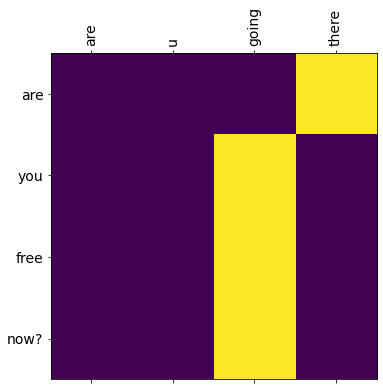

In [ ]:
translate_sentence("are u going there")

Input : i will meet u b4 lec then...
predicted sentence :i will meet you before the lecture then.


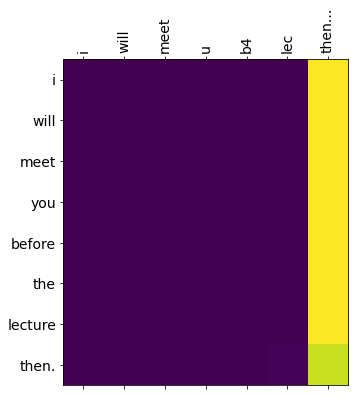

In [ ]:
translate_sentence('i will meet u b4 lec then...')

In [ ]:
train.iloc[12]['corrupted']

'from ho chi minh city , you could go easily to ninh thuan by train and it takes you only 6 hours .'

Input : there were no discount places because it was not planed like this by the theatre .
predicted sentence :there were some words like this works to do , and there was the " one .


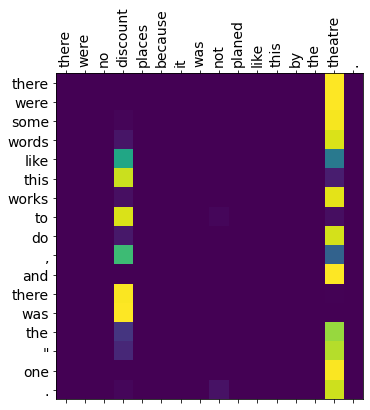

In [ ]:
translate_sentence('there were no discount places because it was not planed like this by the theatre .')

Input : first i did  not accept but finally she conviced me .
predicted sentence :first i would like to stay and three ways .


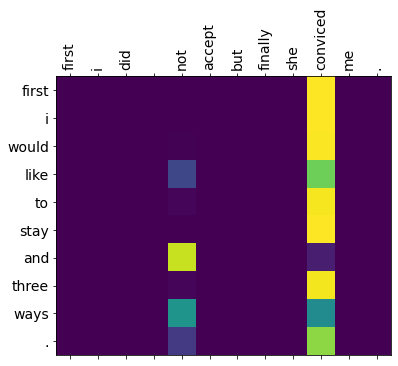

In [ ]:
translate_sentence('first i did  not accept but finally she conviced me .')

In [ ]:
validation.iloc[55]['corrupted']

'during my recent holiday in london i visited one of your shows in the " circle theatre " .'

In [ ]:
validation.iloc[55]['uncorrupted_inp']

'<START> during my recent holiday in london i visited one of your shows at the " circle theatre " .'

Input : on monday we decided to organize a surprise - party for ted  is birthday on tuesday evening .
predicted sentence :in my opinion , there is a small gray carpet under our ticket to prepare .


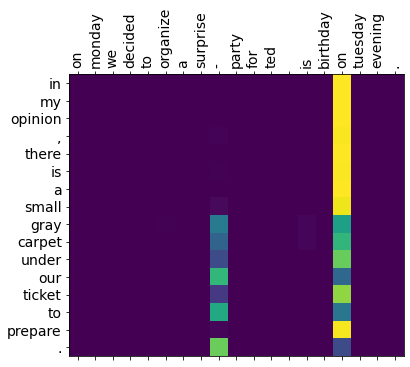

In [ ]:
translate_sentence('on monday we decided to organize a surprise - party for ted  is birthday on tuesday evening .')

##PREDICTION USING BEAM SEARCH

In [ ]:
# https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/
from math import log
from numpy import array
from numpy import argmax
 
# beam search
def beam_search_decoder(data, k):
  sequences = [[list(), 0.0]]
  for row in data:
    all_candidates = list()
    for i in range(len(sequences)):
      seq, score = sequences[i]
      for j in range(len(row)):
        try:
          candidate = [seq + [j], score - log(row[j])]
          all_candidates.append(candidate)
        except ValueError as e:
          candidate = [seq + [j], 0]
          all_candidates.append(candidate)
      # order all candidates by score
    ordered = sorted(all_candidates, key=lambda tup:tup[1])
    # select k best
    sequences = ordered[:k]
  return sequences

In [ ]:
def predict(input_sentence):
  input_vec = tok_corrupted.texts_to_sequences([input_sentence])
  input_vec =  tf.keras.preprocessing.sequence.pad_sequences(input_vec,maxlen=25,padding='post')
  input_vec = tf.convert_to_tensor(input_vec)
  enc_initial_states = None
  enc_out, h_state, c_state = model.layers[0](input_vec,enc_initial_states)
  curr_vec = np.array(tok_uncorrupted.word_index["<start>"])
  curr_vec = curr_vec.reshape(1,1)
  end_vec = np.array(tok_uncorrupted.word_index["<end>"]).reshape(1,1)
  result=''
  atten_weights= np.zeros((25,25)) #(max_target_length, max_source_length)
  for i in range(25):
    decoder_output, lstm_state_h, lstm_state_c, atten_w, context_vectors = model.layers[1].One_Step_Decoder(curr_vec, enc_out, h_state, c_state)
    
    Result_beam_list=beam_search_decoder(decoder_output,k=1)
    Result_beam=Result_beam_list[0][0]
   
    predicted_id = tf.argmax(decoder_output[0]).numpy()
    #Predicted ID using beam search decoder
    
    if tok_uncorrupted.index_word[predicted_id] != '<end>':
      result += tok_uncorrupted.index_word[Result_beam[0]] + ' '
    # the predicted ID is fed back into the model
    atten_w = tf.squeeze(atten_w, axis=-1) #to get shape as (batch, time_step)
        
    atten_w = tf.squeeze(atten_w, axis=0)
    #print(atten_w)
    #atten_w = tf.reshape(atten_w, (-1, ))
    #print(att_weight)
    #atten_weights[i] = atten_w.numpy()
    atten_weights[i][:atten_w.shape[0]] = atten_w.numpy()
    # print(atten_weights)
    h_state, c_state = lstm_state_h, lstm_state_c
    curr_vec = tf.expand_dims([predicted_id], 0)
  return result,input_sentence, atten_weights


In [ ]:
def translate(input_sentence):
    result, input_sentence, attention_plot = predict(input_sentence)
    print('Input: %s' % (input_sentence))
    print('Predicted translation: {}'.format(result))
    print("-"*50)
    attention_plot = attention_plot[:len(result.split(' ')), :len(input_sentence.split(' '))]
    plot_attention(attention_plot, input_sentence.split(' '),    result.split(' '))
    return result

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation.sample(50)
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred,sent,att=predict(i)
  
  predicted.append(pred)
  



In [ ]:
for i in list(zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  
print("average bleu score:",(sum(score)/len(score)))

average bleu score: 0.4598006034132663


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Input: are u going there
Predicted translation: are you free now? 
--------------------------------------------------


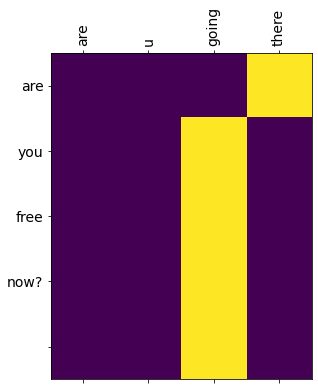

'are you free now? '

In [ ]:
translate("are u going there")

Input: i will meet u b4 lec then...
Predicted translation: i will meet you before the lecture then. 
--------------------------------------------------


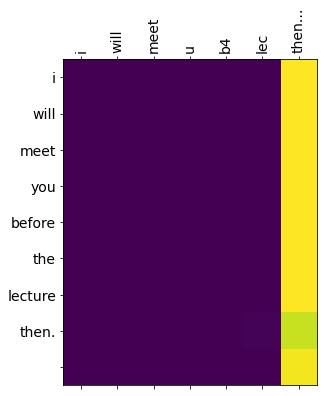

'i will meet you before the lecture then. '

In [ ]:
translate('i will meet u b4 lec then...')

In [ ]:
train.iloc[12]['corrupted']

'from ho chi minh city , you could go easily to ninh thuan by train and it takes you only 6 hours .'

Input: there were no discount places because it was not planed like this by the theatre .
Predicted translation: there were some words like this works to do , and there was the " one . . . 
--------------------------------------------------


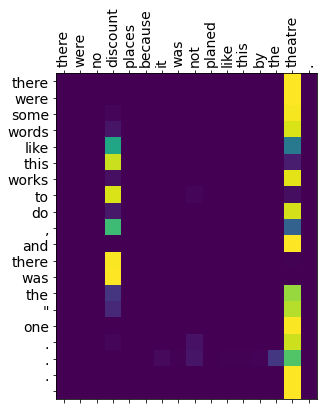

'there were some words like this works to do , and there was the " one . . . '

In [ ]:
translate('there were no discount places because it was not planed like this by the theatre .')

Input: first i did  not accept but finally she conviced me .
Predicted translation: first i would like to stay and three ways . . 
--------------------------------------------------


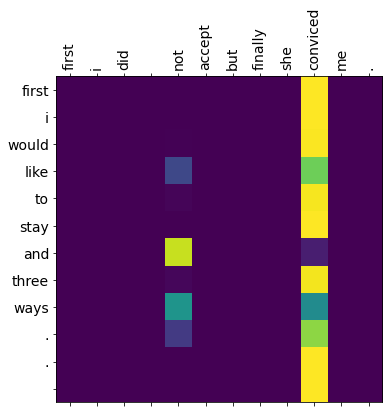

'first i would like to stay and three ways . . '

In [ ]:
translate('first i did  not accept but finally she conviced me .')

In [ ]:
validation.iloc[55]['corrupted']

'during my recent holiday in london i visited one of your shows in the " circle theatre " .'

In [ ]:
validation.iloc[55]['uncorrupted_inp']

'<START> during my recent holiday in london i visited one of your shows at the " circle theatre " .'

Input: on monday we decided to organize a surprise - party for ted  is birthday on tuesday evening .
Predicted translation: in my opinion , there is a small gray carpet under our ticket to prepare . 
--------------------------------------------------


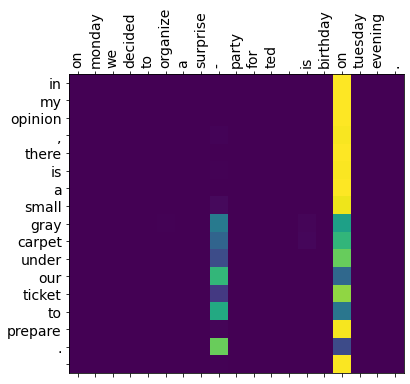

'in my opinion , there is a small gray carpet under our ticket to prepare . '

In [ ]:
translate('on monday we decided to organize a surprise - party for ted  is birthday on tuesday evening .')

##USING GENERAL SCORING FUNCTION

In [ ]:
model  = encoder_decoder(vocab_corrupt,100,256,25,vocab_uncorrupt,256,'general',256,64)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=loss_function)
batch_size=64
train_steps=train.shape[0]//batch_size
valid_steps=validation.shape[0]//batch_size
model.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=150, validation_data=train_dataloader, validation_steps=valid_steps)
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
85/85 [==============================] - 43s 387ms/step - loss: 4.1142 - val_loss: 3.7824
Epoch 2/150
85/85 [==============================] - 30s 353ms/step - loss: 3.5864 - val_loss: 3.5609
Epoch 3/150
85/85 [==============================] - 30s 351ms/step - loss: 3.4506 - val_loss: 3.4735
Epoch 4/150
85/85 [==============================] - 30s 350ms/step - loss: 3.3552 - val_loss: 3.3721
Epoch 5/150
85/85 [==============================] - 30s 350ms/step - loss: 3.2457 - val_loss: 3.2299
Epoch 6/150
85/85 [==============================] - 30s 353ms/step - loss: 3.1307 - val_loss: 3.1396
Epoch 7/150
85/85 [==============================] - 30s 352ms/step - loss: 3.0163 - val_loss: 3.0304
Epoch 8/150
85/85 [==============================] - 30s 355ms/step - loss: 2.9243 - val_loss: 2.9401
Epoch 9/150
85/85 [==============================] - 30s 354ms/step - loss: 2.8458 - val_loss: 2.8756
Epoch 10/150
85/85 [==============================] - 30s 355ms/step - loss: 2.775

##PREDICTION USING GREEDY SEARCH

In [ ]:
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
    #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
    
    #attention_mat= attention[:len(predicted_sentence), :len(sentence)]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show() 

In [ ]:
def predict(input_sentence):

    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
            predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
            Save the attention weights
            And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    
    input_vec = tok_corrupted.texts_to_sequences([input_sentence])
    input_vec =  tf.keras.preprocessing.sequence.pad_sequences(input_vec,maxlen=25,padding='post')
    input_vec = tf.convert_to_tensor(input_vec)
    enc_initial_states = None
    enc_out, h_state, c_state = model.layers[0](input_vec,enc_initial_states)
    curr_vec = np.array(tok_uncorrupted.word_index["<start>"])
    curr_vec = curr_vec.reshape(1,1)
    end_vec = np.array(tok_uncorrupted.word_index["<end>"]).reshape(1,1)
    pred_sentence = []
    atten_weights= np.zeros((25,25)) #(max_target_length, max_source_length)
    for i in range(25):
      decoder_output, lstm_state_h, lstm_state_c, atten_w, context_vectors = model.layers[1].One_Step_Decoder(curr_vec, enc_out, h_state, c_state)  
      #print(decoder_output)      
      curr_vec = np.argmax(decoder_output)
      if np.reshape(curr_vec, (1, 1)) == end_vec:
        break
      pred_sentence.append(curr_vec)
      curr_vec = np.reshape(curr_vec, (1, 1))
      atten_w = tf.squeeze(atten_w, axis=-1) #to get shape as (batch, time_step)
        
      atten_w = tf.squeeze(atten_w, axis=0)
      #print(atten_w)
      #atten_w = tf.reshape(atten_w, (-1, ))
      #print(att_weight)
      #atten_weights[i] = atten_w.numpy()
      atten_weights[i][:atten_w.shape[0]] = atten_w.numpy()
            # print(atten_weights)
      h_state, c_state = lstm_state_h, lstm_state_c
    
   
    return pred_sentence, atten_weights

In [ ]:
def translate_sentence(inp_sentence):
    predicted_sent, atten_weights = predict(inp_sentence)
    
    print('Input :',inp_sentence)
    result = tok_uncorrupted.sequences_to_texts([predicted_sent])
    print('predicted sentence :{}'.format(result[0]))
    
    atten_matrix= atten_weights[:len(result[0].split(' ')), :len(inp_sentence.split(' '))]
    plot_attention(atten_matrix, inp_sentence.split(' '), result[0].split(' '))

In [ ]:
#validation=validation.drop(146)

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred,att=predict(i)
  predicted.append(tok_uncorrupted.sequences_to_texts([pred]))

for i in list(zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1][0].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

100%|██████████| 1175/1175 [04:01<00:00,  4.87it/s]
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


average bleu score: 0.44484346329101465


Input : are u going there
predicted sentence :are you going to


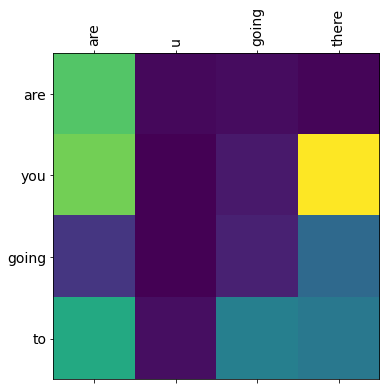

In [ ]:
translate_sentence("are u going there")

Input : i will meet u b4 lec then...
predicted sentence :i will meet you before the lecture then.


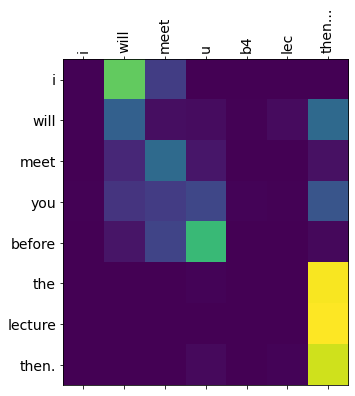

In [ ]:
translate_sentence('i will meet u b4 lec then...')

In [ ]:
train.iloc[12]['corrupted']

'weather forecast points out to prevent from violent storm , rain , snow , etc .'

Input : there were no discount places because it was not planed like this by the theatre .
predicted sentence :there were no discount seats because it was not planned by the theatre like that .


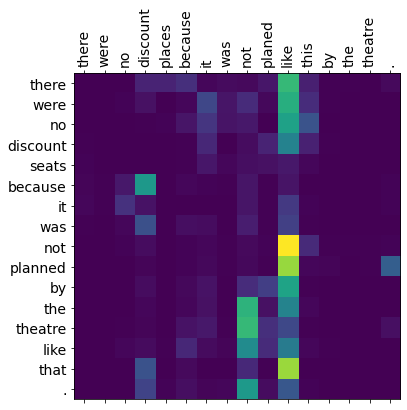

In [ ]:
translate_sentence('there were no discount places because it was not planed like this by the theatre .')

Input : first i did  not accept but finally she conviced me .
predicted sentence :because i did not ask why he never understand


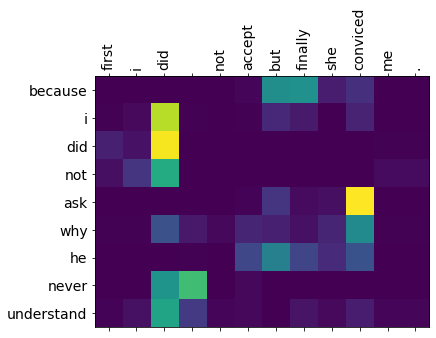

In [ ]:
translate_sentence('first i did  not accept but finally she conviced me .')

In [ ]:
validation.iloc[55]['corrupted']

'people often discuss if tv viewing is useful for the education .'

In [ ]:
validation.iloc[55]['uncorrupted_inp']

'<START> people often discuss if tv viewing is useful for education .'

Input : on monday we decided to organize a surprise - party for ted  is birthday on tuesday evening .
predicted sentence :on monday , we can say one fit in my mind , for example .


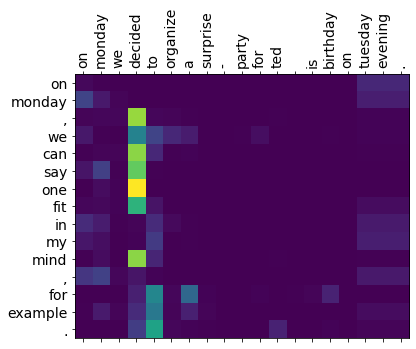

In [ ]:
translate_sentence('on monday we decided to organize a surprise - party for ted  is birthday on tuesday evening .')

##PREDICTION USING BEAM SEARCH

In [ ]:
# https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/
from math import log
from numpy import array
from numpy import argmax
 
# beam search
def beam_search_decoder(data, k):
  sequences = [[list(), 0.0]]
  for row in data:
    all_candidates = list()
    for i in range(len(sequences)):
      seq, score = sequences[i]
      for j in range(len(row)):
        try:
          candidate = [seq + [j], score - log(row[j])]
          all_candidates.append(candidate)
        except ValueError as e:
          candidate = [seq + [j], 0]
          all_candidates.append(candidate)
      # order all candidates by score
    ordered = sorted(all_candidates, key=lambda tup:tup[1])
    # select k best
    sequences = ordered[:k]
  return sequences

In [ ]:
def predict(input_sentence):
  input_vec = tok_corrupted.texts_to_sequences([input_sentence])
  input_vec =  tf.keras.preprocessing.sequence.pad_sequences(input_vec,maxlen=25,padding='post')
  input_vec = tf.convert_to_tensor(input_vec)
  enc_initial_states = None
  enc_out, h_state, c_state = model.layers[0](input_vec,enc_initial_states)
  curr_vec = np.array(tok_uncorrupted.word_index["<start>"])
  curr_vec = curr_vec.reshape(1,1)
  end_vec = np.array(tok_uncorrupted.word_index["<end>"]).reshape(1,1)
  result=''
  atten_weights= np.zeros((25,25)) #(max_target_length, max_source_length)
  for i in range(25):
    decoder_output, lstm_state_h, lstm_state_c, atten_w, context_vectors = model.layers[1].One_Step_Decoder(curr_vec, enc_out, h_state, c_state)
    
    Result_beam_list=beam_search_decoder(decoder_output,k=1)
    Result_beam=Result_beam_list[0][0]
   
    predicted_id = tf.argmax(decoder_output[0]).numpy()
    #Predicted ID using beam search decoder
    
    if tok_uncorrupted.index_word[predicted_id] != '<end>':
      result += tok_uncorrupted.index_word[Result_beam[0]] + ' '
    # the predicted ID is fed back into the model
    atten_w = tf.squeeze(atten_w, axis=-1) #to get shape as (batch, time_step)
        
    atten_w = tf.squeeze(atten_w, axis=0)
    #print(atten_w)
    #atten_w = tf.reshape(atten_w, (-1, ))
    #print(att_weight)
    #atten_weights[i] = atten_w.numpy()
    atten_weights[i][:atten_w.shape[0]] = atten_w.numpy()
    # print(atten_weights)
    h_state, c_state = lstm_state_h, lstm_state_c
    curr_vec = tf.expand_dims([predicted_id], 0)
  return result,input_sentence, atten_weights


In [ ]:
def translate(input_sentence):
    result, input_sentence, attention_plot = predict(input_sentence)
    print('Input: %s' % (input_sentence))
    print('Predicted translation: {}'.format(result))
    print("-"*50)
    attention_plot = attention_plot[:len(result.split(' ')), :len(input_sentence.split(' '))]
    plot_attention(attention_plot, input_sentence.split(' '),    result.split(' '))
    return result

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation.sample(50)
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred,att,sent=predict(i)
  predicted.append(pred)




In [ ]:
for i in list(zip(test['uncorrupted_inp'].values,predicted)):
  
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  
print("average bleu score:",(sum(score)/len(score)))

average bleu score: 0.5009680033181769


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Input: are u going there
Predicted translation: are you going to 
--------------------------------------------------


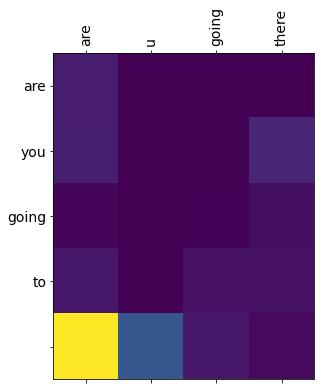

'are you going to '

In [ ]:
translate("are u going there")

Input: i will meet u b4 lec then...
Predicted translation: i will meet you before the lecture then. 
--------------------------------------------------


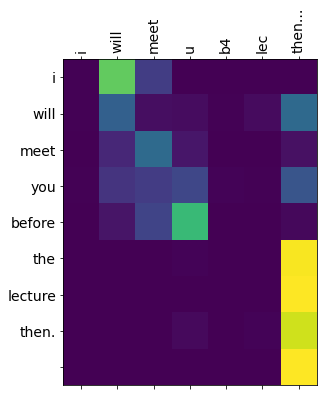

'i will meet you before the lecture then. '

In [ ]:
translate('i will meet u b4 lec then...')

In [ ]:
train.iloc[12]['corrupted']

'weather forecast points out to prevent from violent storm , rain , snow , etc .'

Input: there were no discount places because it was not planed like this by the theatre .
Predicted translation: there were no discount seats because it was not planned by the theatre like that . . . 
--------------------------------------------------


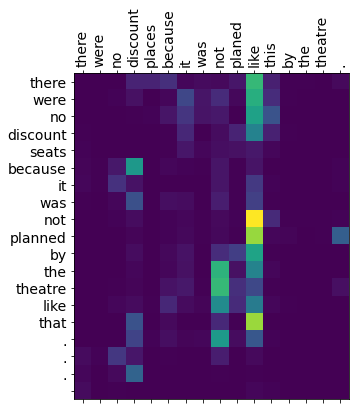

'there were no discount seats because it was not planned by the theatre like that . . . '

In [ ]:
translate('there were no discount places because it was not planed like this by the theatre .')

Input: first i did  not accept but finally she conviced me .
Predicted translation: because i did not ask why he never understand . . 
--------------------------------------------------


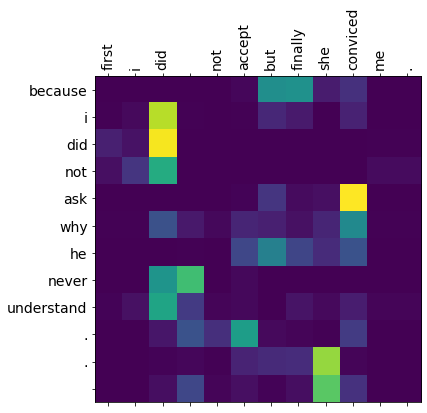

'because i did not ask why he never understand . . '

In [ ]:
translate('first i did  not accept but finally she conviced me .')

In [ ]:
validation.iloc[55]['corrupted']

'people often discuss if tv viewing is useful for the education .'

In [ ]:
validation.iloc[55]['uncorrupted_inp']

'<START> people often discuss if tv viewing is useful for education .'

Input: people often discuss if tv viewing is useful for the education .
Predicted translation: people is like to waste of them and click everything they want . . 
--------------------------------------------------


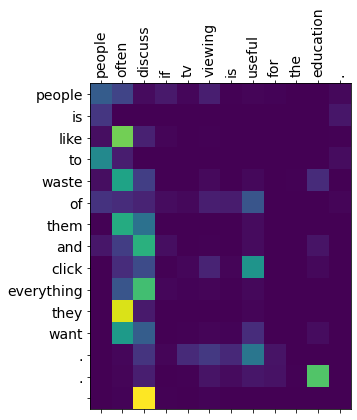

'people is like to waste of them and click everything they want . . '

In [ ]:
translate(validation.iloc[55]['corrupted'])

##USING CONCAT SCORING FUNCTION

In [62]:
model  = encoder_decoder(vocab_corrupt,100,256,25,vocab_uncorrupt,256,'concat',256,64)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=loss_function)
batch_size=64
train_steps=train.shape[0]//batch_size
valid_steps=validation.shape[0]//batch_size
model.fit_generator(train_dataloader, steps_per_epoch=train_steps, epochs=150, validation_data=train_dataloader, validation_steps=valid_steps)
model.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
85/85 [==============================] - 43s 375ms/step - loss: 4.1359 - val_loss: 3.8006
Epoch 2/150
85/85 [==============================] - 30s 350ms/step - loss: 3.6129 - val_loss: 3.6248
Epoch 3/150
85/85 [==============================] - 29s 347ms/step - loss: 3.4744 - val_loss: 3.5181
Epoch 4/150
85/85 [==============================] - 29s 346ms/step - loss: 3.3759 - val_loss: 3.3972
Epoch 5/150
85/85 [==============================] - 29s 347ms/step - loss: 3.2730 - val_loss: 3.3010
Epoch 6/150
85/85 [==============================] - 29s 347ms/step - loss: 3.1789 - val_loss: 3.2203
Epoch 7/150
85/85 [==============================] - 30s 349ms/step - loss: 3.0799 - val_loss: 3.1027
Epoch 8/150
85/85 [==============================] - 29s 344ms/step - loss: 2.9875 - val_loss: 3.0189
Epoch 9/150
85/85 [==============================] - 29s 347ms/step - loss: 2.9071 - val_loss: 2.9458
Epoch 10/150
85/85 [==============================] - 29s 343ms/step - loss: 2.834

##PREDICTION USING GREEDY SEARCH

In [63]:
#https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
    #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate
    
    #attention_mat= attention[:len(predicted_sentence), :len(sentence)]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) 
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show() 

In [104]:
def predict(input_sentence):

    '''
    A. Given input sentence, convert the sentence into integers using tokenizer used earlier
    B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
    C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
    D. till we reach max_length of decoder or till the model predicted word <end>:
            predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
            Save the attention weights
            And get the word using the tokenizer(word index) and then store it in a string.
    E. Call plot_attention(#params)
    F. Return the predicted sentence
    '''
    
    input_vec = tok_corrupted.texts_to_sequences([input_sentence])
    input_vec =  tf.keras.preprocessing.sequence.pad_sequences(input_vec,maxlen=25,padding='post')
    input_vec = tf.convert_to_tensor(input_vec)
    enc_initial_states = None
    enc_out, h_state, c_state = model.layers[0](input_vec,enc_initial_states)
    curr_vec = np.array(tok_uncorrupted.word_index["<start>"])
    curr_vec = curr_vec.reshape(1,1)
    end_vec = np.array(tok_uncorrupted.word_index["<end>"]).reshape(1,1)
    pred_sentence = []
    atten_weights= np.zeros((25,25)) #(max_target_length, max_source_length)
    for i in range(25):
      decoder_output, lstm_state_h, lstm_state_c, atten_w, context_vectors = model.layers[1].One_Step_Decoder(curr_vec, enc_out, h_state, c_state)  
      #print(decoder_output)      
      curr_vec = np.argmax(decoder_output)
      if np.reshape(curr_vec, (1, 1)) == end_vec:
        break
      pred_sentence.append(curr_vec)
      curr_vec = np.reshape(curr_vec, (1, 1))
      atten_w = tf.squeeze(atten_w, axis=-1) #to get shape as (batch, time_step)
        
      atten_w = tf.squeeze(atten_w, axis=0)
      #print(atten_w)
      #atten_w = tf.reshape(atten_w, (-1, ))
      #print(att_weight)
      #atten_weights[i] = atten_w.numpy()
      atten_weights[i][:atten_w.shape[0]] = atten_w.numpy()
            # print(atten_weights)
      h_state, c_state = lstm_state_h, lstm_state_c
    
   
    return pred_sentence, atten_weights

In [105]:
def translate_sentence(inp_sentence):
    predicted_sent, atten_weights = predict(inp_sentence)
    
    print('Input :',inp_sentence)
    result = tok_uncorrupted.sequences_to_texts([predicted_sent])
    print('predicted sentence :{}'.format(result[0]))
    
    atten_matrix= atten_weights[:len(result[0].split(' ')), :len(inp_sentence.split(' '))]
    plot_attention(atten_matrix, inp_sentence.split(' '), result[0].split(' '))

In [66]:
#validation=validation.drop(146)

In [67]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred,att=predict(i)
  predicted.append(tok_uncorrupted.sequences_to_texts([pred]))

for i in list(zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1][0].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

100%|██████████| 1175/1175 [04:07<00:00,  4.74it/s]
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


average bleu score: 0.45099136183351396


Input : are u going there
predicted sentence :are you going tomorrow?


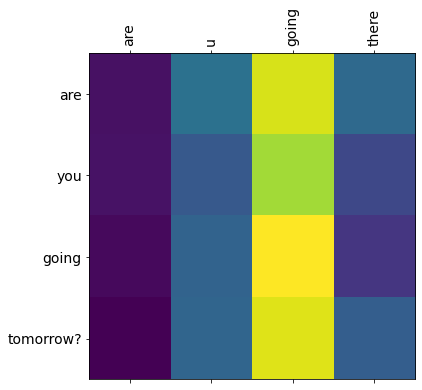

In [106]:
translate_sentence("are u going there")

Input : i will meet u b4 lec then...
predicted sentence :i will meet you before the lecture then.


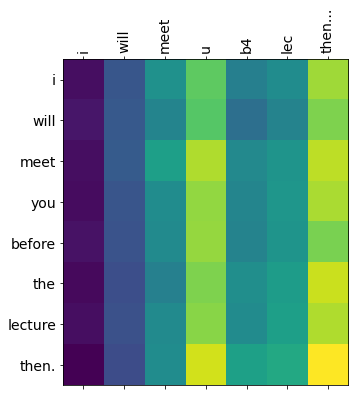

In [107]:
translate_sentence('i will meet u b4 lec then...')

In [109]:
train.iloc[12]['corrupted']

'the supremacy of parliament will never be challanged .'

Input : the supremacy of parliament will never be challanged .
predicted sentence :the supremacy of parliament will never be challenged .


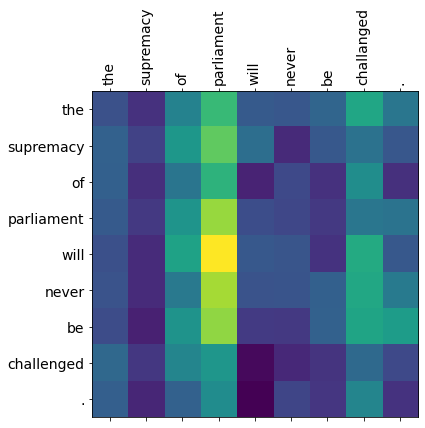

In [108]:
translate_sentence(train.iloc[12]['corrupted'])

Input : first i did  not accept but finally she conviced me .
predicted sentence :first i can tell her for excellent as but i think .


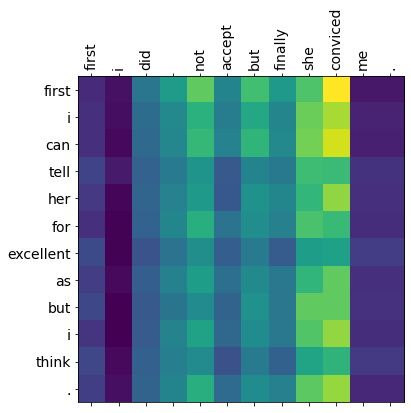

In [110]:
translate_sentence('first i did  not accept but finally she conviced me .')

In [73]:
validation.iloc[55]['corrupted']

'i am writing about a problem at my city .'

In [74]:
validation.iloc[55]['uncorrupted_inp']

'<START> i am writing about a problem in my city .'

In [ ]:
translate_sentence('i am writing about a problem at my city .')

##PREDICTION USING BEAM SEARCH

In [76]:
# https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/
from math import log
from numpy import array
from numpy import argmax
 
# beam search
def beam_search_decoder(data, k):
  sequences = [[list(), 0.0]]
  for row in data:
    all_candidates = list()
    for i in range(len(sequences)):
      seq, score = sequences[i]
      for j in range(len(row)):
        try:
          candidate = [seq + [j], score - log(row[j])]
          all_candidates.append(candidate)
        except ValueError as e:
          candidate = [seq + [j], 0]
          all_candidates.append(candidate)
      # order all candidates by score
    ordered = sorted(all_candidates, key=lambda tup:tup[1])
    # select k best
    sequences = ordered[:k]
  return sequences

In [91]:
def predict(input_sentence):
  input_vec = tok_corrupted.texts_to_sequences([input_sentence])
  input_vec =  tf.keras.preprocessing.sequence.pad_sequences(input_vec,maxlen=25,padding='post')
  input_vec = tf.convert_to_tensor(input_vec)
  enc_initial_states = None
  enc_out, h_state, c_state = model.layers[0](input_vec,enc_initial_states)
  curr_vec = np.array(tok_uncorrupted.word_index["<start>"])
  curr_vec = curr_vec.reshape(1,1)
  end_vec = np.array(tok_uncorrupted.word_index["<end>"]).reshape(1,1)
  result=''
  atten_weights= np.zeros((25,25)) #(max_target_length, max_source_length)
  for i in range(25):
    decoder_output, lstm_state_h, lstm_state_c, atten_w, context_vectors = model.layers[1].One_Step_Decoder(curr_vec, enc_out, h_state, c_state)
    
    Result_beam_list=beam_search_decoder(decoder_output,k=1)
    Result_beam=Result_beam_list[0][0]
   
    predicted_id = tf.argmax(decoder_output[0]).numpy()
    #Predicted ID using beam search decoder
    
    if tok_uncorrupted.index_word[predicted_id] != '<end>':
      result += tok_uncorrupted.index_word[Result_beam[0]] + ' '
    # the predicted ID is fed back into the model
    atten_w = tf.squeeze(atten_w, axis=-1) #to get shape as (batch, time_step)
        
    atten_w = tf.squeeze(atten_w, axis=0)
    #print(atten_w)
    #atten_w = tf.reshape(atten_w, (-1, ))
    #print(att_weight)
    #atten_weights[i] = atten_w.numpy()
    atten_weights[i][:atten_w.shape[0]] = atten_w.numpy()
    # print(atten_weights)
    h_state, c_state = lstm_state_h, lstm_state_c
    curr_vec = tf.expand_dims([predicted_id], 0)
  return result,input_sentence, atten_weights


In [92]:
def translate(input_sentence):
    result, input_sentence, attention_plot = predict(input_sentence)
    print('Input: %s' % (input_sentence))
    print('Predicted translation: {}'.format(result))
    print("-"*50)
    attention_plot = attention_plot[:len(result.split(' ')), :len(input_sentence.split(' '))]
    plot_attention(attention_plot, input_sentence.split(' '),    result.split(' '))
    return result

In [79]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html
from tqdm import tqdm
import nltk.translate.bleu_score as bleu
test=validation.sample(50)
score=[]
predicted=[]
test_inp=test['corrupted'].values

for i in tqdm(test_inp):
  
  pred,sent,att=predict(i)
  predicted.append(pred)

for i in list(zip(test['uncorrupted_inp'].values,predicted)):
  score.append(bleu.sentence_bleu([i[0].split(' ')[1:]],i[1].split(' ')))
  #print(i[0].split()[1:])
  #print(i[1][0].split())
print("average bleu score:",(sum(score)/len(score)))

100%|██████████| 50/50 [1:08:27<00:00, 82.14s/it]

average bleu score: 0.48410624932405066



/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Input: are u going there
Predicted translation: are you going tomorrow? 
--------------------------------------------------


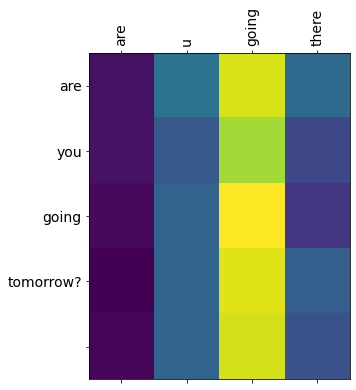

'are you going tomorrow? '

In [97]:
translate("are u going there")

Input: i will meet u b4 lec then...
Predicted translation: i will meet you before the lecture then. 
--------------------------------------------------


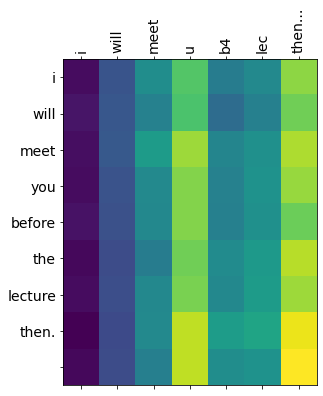

'i will meet you before the lecture then. '

In [98]:
translate('i will meet u b4 lec then...')

In [99]:
train.iloc[12]['corrupted']

'the supremacy of parliament will never be challanged .'

Input: the supremacy of parliament will never be challanged .
Predicted translation: the supremacy of parliament will never be challenged . . . . . 
--------------------------------------------------


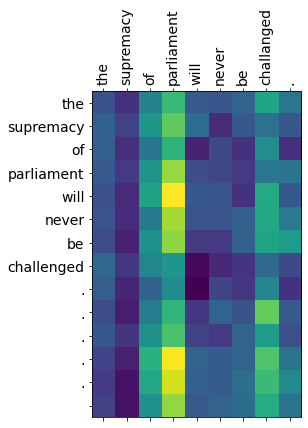

'the supremacy of parliament will never be challenged . . . . . '

In [101]:
translate('the supremacy of parliament will never be challanged .')

Input: first i did  not accept but finally she conviced me .
Predicted translation: first i can tell her for excellent as but i think . . . . 
--------------------------------------------------


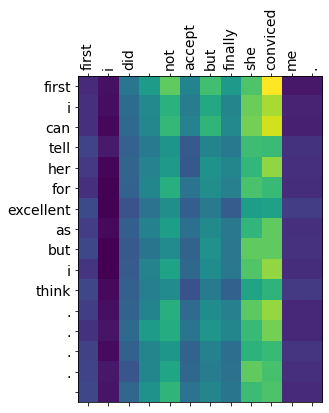

'first i can tell her for excellent as but i think . . . . '

In [102]:
translate('first i did  not accept but finally she conviced me .')

In [96]:
validation.iloc[55]['uncorrupted_inp']

'<START> i am writing about a problem in my city .'

Input: i am writing about a problem at my city .
Predicted translation: i am writing to you about a summer camps . . . . . 
--------------------------------------------------


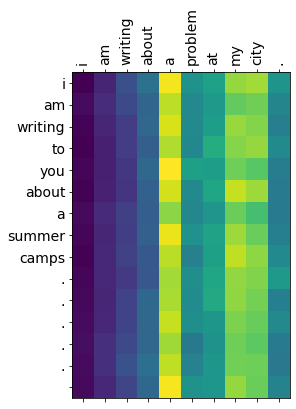

'i am writing to you about a summer camps . . . . . '

In [93]:
translate(validation.iloc[55]['corrupted'])